In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Misclassification Analysis will be found towards the end of this notebook.

In [ ]:
import pandas as pd

parquet_file_path = '/content/drive/My Drive/NEST/Data/category_updated_test.csv' #Update the file to the category_updated_test.csv file that is availble for download in the rtf document file.
# usecase_3.to_parquet(parquet_file_path, index=False)

# Load the Parquet file back into a DataFrame
usecase_3 = pd.read_csv(parquet_file_path, index_col=False)

usecase_3.head()

,Unnamed: 0.1,Unnamed: 0,NCT Number,Study Title,Study URL,Acronym,Brief Summary,Study Results,Conditions,Interventions,...,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,Study Status,Conditions_Category
0,0,0,NCT03162666,Patient Outcomes Using an Expandable Spacer,https://clinicaltrials.gov/study/NCT03162666,NaN,This study is a post-market clinical follow-up...,NO,Degenerative Disc Disease,DEVICE: ALTERA,...,2/28/17,11-06-20,11-06-20,5/22/17,NaN,8/23/21,"Rush University Medical Center, Chicago, Illin...",NaN,WITHDRAWN,Non-Oncology
1,1,1,NCT04312048,the Effect of Isosorbide Mononitrate in Reduci...,https://clinicaltrials.gov/study/NCT04312048,NaN,The aim of the study is to evaluate the effica...,NO,IUD Insertion Pain,DRUG: Isosorbide mononitrate|DRUG: placebo,...,4/15/20,10/25/20,11/30/20,3/18/20,NaN,1/20/21,"Ahmed Samy, Giza, 11231, Egypt",NaN,COMPLETED,Non-Oncology
2,2,2,NCT03144778,Durvalumab With or Without Tremelimumab in Tre...,https://clinicaltrials.gov/study/NCT03144778,NaN,This phase I trial studies how well durvalumab...,NO,Stage II Oropharyngeal Squamous Cell Carcinoma...,BIOLOGICAL: Durvalumab|BIOLOGICAL: Tremelimumab,...,07-12-17,3/15/21,3/15/21,05-09-17,NaN,3/18/21,"M D Anderson Cancer Center, Houston, Texas, 77...",NaN,COMPLETED,Oncology
3,3,3,NCT01592721,Radiation and Cetuximab Plus Intratumoral EGFR...,https://clinicaltrials.gov/study/NCT01592721,NaN,The incorporation of novel targeted therapies ...,YES,Squamous Cell Carcinoma|Head and Neck Cancer,BIOLOGICAL: EGFR Antisense DNA,...,2013-04,02-01-22,02-01-22,05-07-12,9/21/22,9/21/22,"University of Pittsburgh, Pittsburgh, Pennsylv...","Study Protocol and Statistical Analysis Plan, ...",COMPLETED,Oncology
4,4,4,NCT04253613,Laser Biostimulation in Periodontal Treatment,https://clinicaltrials.gov/study/NCT04253613,NaN,"The use of nonsurgical periodontal treatment, ...",NO,Periodontal Inflammation|Periodontal Diseases,NaN,...,1/15/13,6/15/14,6/15/14,02-05-20,NaN,07-06-22,NaN,NaN,COMPLETED,Non-Oncology


In [ ]:
usecase_3.shape

(64395, 33)

In [ ]:
# Ensure Start Date is in datetime format
usecase_3['Start Date'] = pd.to_datetime(usecase_3['Start Date'], errors='coerce')

# Extract month and quarter, handling missing values
usecase_3['Start Month'] = usecase_3['Start Date'].dt.month.fillna(-1).astype(int).astype('category')
usecase_3['Start Quarter'] = usecase_3['Start Date'].dt.quarter.fillna(-1).astype(int).astype('category')

# Verify the changes
usecase_3[['Start Date', 'Start Month', 'Start Quarter']].head()

<ipython-input-74-9cbb6f848685>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  usecase_3['Start Date'] = pd.to_datetime(usecase_3['Start Date'], errors='coerce')


,Start Date,Start Month,Start Quarter
0,2017-02-28,2,1
1,2020-04-15,4,2
2,2017-07-12,7,3
3,2013-04-01,4,2
4,2013-01-15,1,1


In [ ]:
usecase_3 = usecase_3[['NCT Number', 'Study Title', 'Study Status',
       'Brief Summary', 'Conditions', 'Primary Outcome Measures',
       'Secondary Outcome Measures', 'Other Outcome Measures', 'Sponsor',
       'Collaborators', 'Sex', 'Age', 'Phases', 'Enrollment', 'Funder Type',
       'Study Type', 'Study Design', 'Start Month', 'Start Quarter', 'Conditions_Category', 'Locations']]
usecase_3.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Conditions', 'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Start Month', 'Start Quarter', 'Conditions_Category', 'Locations'],
      dtype='object')

In [ ]:
# def refine_condition_category(condition):
#     if pd.isnull(condition):
#         return 'Unknown'

#     condition_lower = condition.lower()

#     # Oncology
#     if any(keyword in condition_lower for keyword in ['cancer', 'tumor', 'leukemia', 'lymphoma', 'melanoma']):
#         return 'Oncology'

#     # High-Risk Non-Oncology
#     if any(keyword in condition_lower for keyword in ['stroke', 'heart failure', 'coronary artery disease', 'atrial fibrillation', 'parkinson', 'alzheimer', 'multiple sclerosis', 'cystic fibrosis', 'type 1 diabetes']):
#         return 'High-Risk Non-Oncology'

#     # Moderate-Risk Non-Oncology
#     if any(keyword in condition_lower for keyword in ['type 2 diabetes', 'hypertension', 'rheumatoid arthritis', 'osteoarthritis', 'copd', 'hiv', 'epilepsy', 'psoriasis', 'atopic dermatitis']):
#         return 'Moderate-Risk Non-Oncology'

#     # Low-Risk Non-Oncology
#     if any(keyword in condition_lower for keyword in ['obesity', 'infertility', 'low back pain', 'postoperative pain', 'healthy']):
#         return 'Low-Risk Non-Oncology'

#     # Infectious Diseases
#     if any(keyword in condition_lower for keyword in ['covid', 'influenza', 'hiv', 'malaria', 'tuberculosis', 'hepatitis']):
#         return 'Infectious Diseases'

#     # Mental Health Disorders
#     if any(keyword in condition_lower for keyword in ['schizophrenia', 'depression', 'anxiety']):
#         return 'Mental Health Disorders'

#     # Gastroenterology
#     if any(keyword in condition_lower for keyword in ['crohn', 'ibd', 'hepatitis', 'liver', 'gastrointestinal', 'colitis', 'pancreatitis']):
#         return 'Gastroenterology'

#     # Autoimmune & Inflammatory Diseases
#     if any(keyword in condition_lower for keyword in ['lupus', 'autoimmune', 'inflammatory', 'fibromyalgia', 'myositis']):
#         return 'Autoimmune & Inflammatory'

#     # Endocrinology & Metabolic Disorders
#     if any(keyword in condition_lower for keyword in ['hyperlipidemia', 'metabolic', 'thyroid', 'osteoporosis', 'insulin']):
#         return 'Endocrinology & Metabolic'

#     # Rare Genetic Disorders
#     if any(keyword in condition_lower for keyword in ['sickle', 'hemophilia', 'duchenne', 'muscular dystrophy', 'cystinosis']):
#         return 'Rare Genetic Disorders'

#     # Musculoskeletal & Pain Disorders
#     if any(keyword in condition_lower for keyword in ['arthritis', 'osteoporosis', 'fibromyalgia', 'joint', 'muscle', 'tendon']):
#         return 'Musculoskeletal & Pain'

#     return 'Other Rare or Unclassified'

# # Apply updated classification
# usecase_3['Condition_Category_manual'] = usecase_3['Conditions'].apply(refine_condition_category)

# # Check the updated distribution
# print(usecase_3['Condition_Category_manual'].value_counts())

In [ ]:
usecase_3.Conditions_Category.value_counts()

,count
Conditions_Category,
Non-Oncology,37998
Other Rare or Unclassified,17347
Oncology,9050


In [ ]:
conditions_category_distribution = (
    usecase_3.groupby(['Conditions_Category', 'Study Status']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)
)
conditions_category_distribution

,Study Status,ACTIVE_NOT_RECRUITING,COMPLETED,ENROLLING_BY_INVITATION,NOT_YET_RECRUITING,RECRUITING,SUSPENDED,TERMINATED,WITHDRAWN
Conditions_Category,Conditions_Category,,,,,,,,
Non-Oncology,Non-Oncology,0.015790,88.241486,0.002632,0.00000,0.013159,0.418443,7.321438,3.987052
Oncology,Oncology,0.044199,75.812155,0.000000,0.01105,0.044199,0.662983,17.093923,6.331492
Other Rare or Unclassified,Other Rare or Unclassified,0.028823,85.294287,0.000000,0.00000,0.011529,0.461175,9.465614,4.738572


In [ ]:
# conditions_category_distribution = (
#     usecase_3.groupby(['Condition_Category_manual', 'Study Status']).size()
#     .groupby(level=0).apply(lambda x: 100 * x / x.sum())
#     .unstack(fill_value=0)
# )
# conditions_category_distribution

In [ ]:
usecase_3['Collaborators'].value_counts()

,count
Collaborators,
National Cancer Institute (NCI),1185
National Institute of Mental Health (NIMH),264
"National Heart, Lung, and Blood Institute (NHLBI)",250
National Institute on Drug Abuse (NIDA),230
Merck Sharp & Dohme LLC,185
...,...
Rush University Medical Center|Grady Memorial Hospital|University of Southern California,1
Nipro Europe N.V.,1
"University of Bordeaux|University Hospital, Bordeaux",1


In [ ]:
# Count number of collaborators per trial
usecase_3['Num_Collaborators'] = usecase_3['Collaborators'].apply(lambda x: len(str(x).split('|')) if pd.notna(x) else 0)
# Count number of collaborators per trial
usecase_3['Num_Collaborators'] = usecase_3['Collaborators'].apply(lambda x: len(str(x).split('|')) if pd.notna(x) else 0)
# Expanded keyword-based classification
def refine_collaborator_type(collaborator):
    if pd.isna(collaborator) or collaborator.strip() == "":
        return "Unknown"

    collaborator = collaborator.lower()

    # Pharmaceutical/Biotech Companies
    if any(x in collaborator for x in ["pharma", "biotech", "therapeutics", "biosciences", "genomics", "biopharma", "life sciences", "vaccines", "therapeutics"]):
        return "Pharmaceutical/Biotech"

    # Medical Device Companies
    elif any(x in collaborator for x in ["medtech", "medical devices", "diagnostics", "boston scientific", "medtronic", "abbott", "siemens healthineers", "imaging", "st. jude medical", "stryker"]):
        return "Medical Device Company"

    # Universities & Academic Institutions
    elif any(x in collaborator for x in ["university", "college", "academy", "school of medicine", "medical school"]):
        return "University"

    # Hospitals & Medical Centers
    elif any(x in collaborator for x in ["hospital", "medical center", "health system", "clinic", "health network", "cancer center", "teaching hospital"]):
        return "Hospital/Medical Center"

    # Academic Research Centers
    elif any(x in collaborator for x in ["institute of technology", "research institute", "academic research", "broad institute", "howard hughes", "karolinska institute"]):
        return "Academic Research Institute"

    # Non-Academic Research Centers
    elif any(x in collaborator for x in ["national laboratory", "max planck", "clinical research", "research foundation"]):
        return "Non-Academic Research Institute"

    # Government & Public Health Agencies
    elif any(x in collaborator for x in ["national", "federal", "ministry of health", "nih", "fda", "cdc", "who", "government", "department of health", "european medicines agency", "health canada"]):
        return "Government"

    # Military & Defense Medical Research
    elif any(x in collaborator for x in ["military", "army", "navy", "air force", "veterans affairs", "dod", "defense", "va medical", "darpa", "us army medical research"]):
        return "Military/Defense Medical Research"

    # Non-Profit Organizations & NGOs
    elif any(x in collaborator for x in ["non-profit", "ngo", "humanitarian", "relief fund", "patient advocacy", "community group", "alzheimer's association", "parkinson's foundation"]):
        return "Non-Profit / Patient Advocacy"

    # Foundations (Funding Agencies)
    elif any(x in collaborator for x in ["foundation", "charitable trust", "funding agency", "gates foundation", "michael j. fox foundation"]):
        return "Foundation (Funding Organization)"

    # Contract Research Organizations (CROs)
    elif any(x in collaborator for x in ["quintiles", "iqvia", "parexel", "covance", "medpace", "ppd", "icon", "charles river", "syneos", "contract research"]):
        return "Contract Research Organization (CRO)"

    # Healthcare Consortia & Alliances
    elif any(x in collaborator for x in ["consortium", "partnership", "collaborative", "alliance", "global initiative"]):
        return "Healthcare Consortium/Alliance"

    # If no match, return Other
    else:
        return "Other"

# Apply classification
usecase_3['Collaborator_Type'] = usecase_3['Collaborators'].apply(refine_collaborator_type)
usecase_3.head()

,NCT Number,Study Title,Study Status,Brief Summary,Conditions,Primary Outcome Measures,Secondary Outcome Measures,Other Outcome Measures,Sponsor,Collaborators,...,Enrollment,Funder Type,Study Type,Study Design,Start Month,Start Quarter,Conditions_Category,Locations,Num_Collaborators,Collaborator_Type
0,NCT03162666,Patient Outcomes Using an Expandable Spacer,WITHDRAWN,This study is a post-market clinical follow-up...,Degenerative Disc Disease,"Change in Radiographic Analysis, Global and Se...","Complications, Surgical or device related comp...",NaN,Globus Medical Inc,NaN,...,0.0,INDUSTRY,OBSERVATIONAL,Observational Model: |Time Perspective: p,2,1,Non-Oncology,"Rush University Medical Center, Chicago, Illin...",0,Unknown
1,NCT04312048,the Effect of Isosorbide Mononitrate in Reduci...,COMPLETED,The aim of the study is to evaluate the effica...,IUD Insertion Pain,"pain during IUD insertion, intensity of patien...","duration of IUD insertion, duration of IUD ins...",NaN,Cairo University,NaN,...,110.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,4,2,Non-Oncology,"Ahmed Samy, Giza, 11231, Egypt",0,Unknown
2,NCT03144778,Durvalumab With or Without Tremelimumab in Tre...,COMPLETED,This phase I trial studies how well durvalumab...,Stage II Oropharyngeal Squamous Cell Carcinoma...,"Change of CD8+ tumor infiltrating lymphocytes,...",Incidence of adverse events and serious advers...,NaN,M.D. Anderson Cancer Center,National Cancer Institute (NCI),...,39.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,7,3,Oncology,"M D Anderson Cancer Center, Houston, Texas, 77...",1,Government
3,NCT01592721,Radiation and Cetuximab Plus Intratumoral EGFR...,COMPLETED,The incorporation of novel targeted therapies ...,Squamous Cell Carcinoma|Head and Neck Cancer,"Toxicity Rate, This is a 2-stage clinical tria...","Tumor Response, Clinical secondary endpoints i...",NaN,The University of Texas Health Science Center ...,University of Pittsburgh,...,6.0,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,4,2,Oncology,"University of Pittsburgh, Pittsburgh, Pennsylv...",1,University
4,NCT04253613,Laser Biostimulation in Periodontal Treatment,COMPLETED,"The use of nonsurgical periodontal treatment, ...",Periodontal Inflammation|Periodontal Diseases,"IL-1β level in GCF, IL-1β is a cytokine presen...",NaN,NaN,Ondokuz Mayıs University,NaN,...,30.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,1,1,Non-Oncology,NaN,0,Unknown


In [ ]:
usecase_3.Collaborator_Type.value_counts()

,count
Collaborator_Type,
Unknown,43581
Other,7005
University,4843
Government,4362
Hospital/Medical Center,1586
Pharmaceutical/Biotech,1349
Foundation (Funding Organization),610
Medical Device Company,293
Academic Research Institute,231


In [ ]:
usecase_3['Sex'] = usecase_3['Sex'].fillna('ALL')

usecase_3['Phases'] = usecase_3['Phases'].fillna('PHASE2')

# Map specific values to new categories
phase_mapping = {
    'PHASE1|PHASE2': 'PHASE1.5',
    'PHASE2|PHASE3': 'PHASE2.5',
    'EARLY_PHASE1': 'PHASE0'
}

# Replace the mapped values
usecase_3['Phases'] = usecase_3['Phases'].replace(phase_mapping)

In [ ]:
usecase_3 = usecase_3.drop(columns=['Collaborators'])
usecase_3.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Conditions', 'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Sex', 'Age', 'Phases',
       'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Start Month', 'Start Quarter', 'Conditions_Category', 'Locations',
       'Num_Collaborators', 'Collaborator_Type'],
      dtype='object')

In [ ]:
missing_count = usecase_3.isnull().sum()

# Percentage of missing values in each column
missing_percentage = (missing_count / len(usecase_3)) * 100

# Combine into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage
})
missing_summary

,Missing Count,Missing Percentage (%)
NCT Number,0,0.000000
Study Title,0,0.000000
Study Status,0,0.000000
Brief Summary,0,0.000000
Conditions,0,0.000000
Primary Outcome Measures,2616,4.062427
Secondary Outcome Measures,18068,28.058079
Other Outcome Measures,59863,92.962187
Sponsor,57,0.088516
Sex,0,0.000000


In [ ]:
usecase_3['Primary Outcome Measures']

,Primary Outcome Measures
0,"Change in Radiographic Analysis, Global and Se..."
1,"pain during IUD insertion, intensity of patien..."
2,"Change of CD8+ tumor infiltrating lymphocytes,..."
3,"Toxicity Rate, This is a 2-stage clinical tria..."
4,"IL-1β level in GCF, IL-1β is a cytokine presen..."
...,...
64390,Values of gene testing between routine method ...
64391,"Disability scale of Kurtzke EDSS score, up to ..."
64392,Number of Participants With Serious Adverse Ev...
64393,Proportion of participants with recurrent urin...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

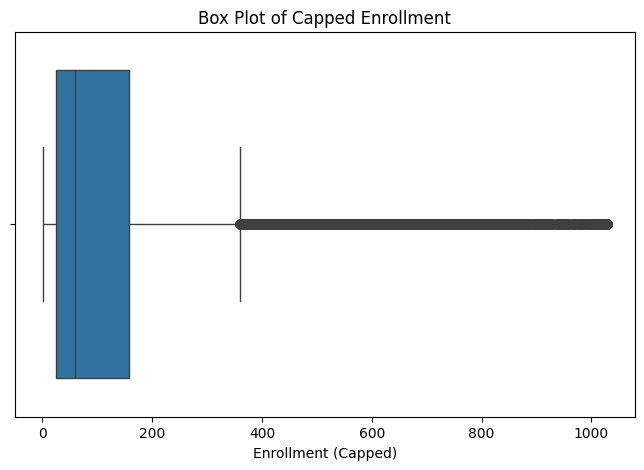

In [ ]:
import numpy as np

# Define IQR-based outlier capping function
def cap_outliers(series, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = np.percentile(series.dropna(), lower_percentile * 100)
    upper_bound = np.percentile(series.dropna(), upper_percentile * 100)
    return np.clip(series, lower_bound, upper_bound)

# Cap outliers in Enrollment column
usecase_3['Enrollment_Capped'] = cap_outliers(usecase_3['Enrollment'])

# Create a box plot for Enrollment after capping outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=usecase_3['Enrollment_Capped'])

# Set title and labels
plt.title('Box Plot of Capped Enrollment')
plt.xlabel('Enrollment (Capped)')

# Show plot
plt.show()

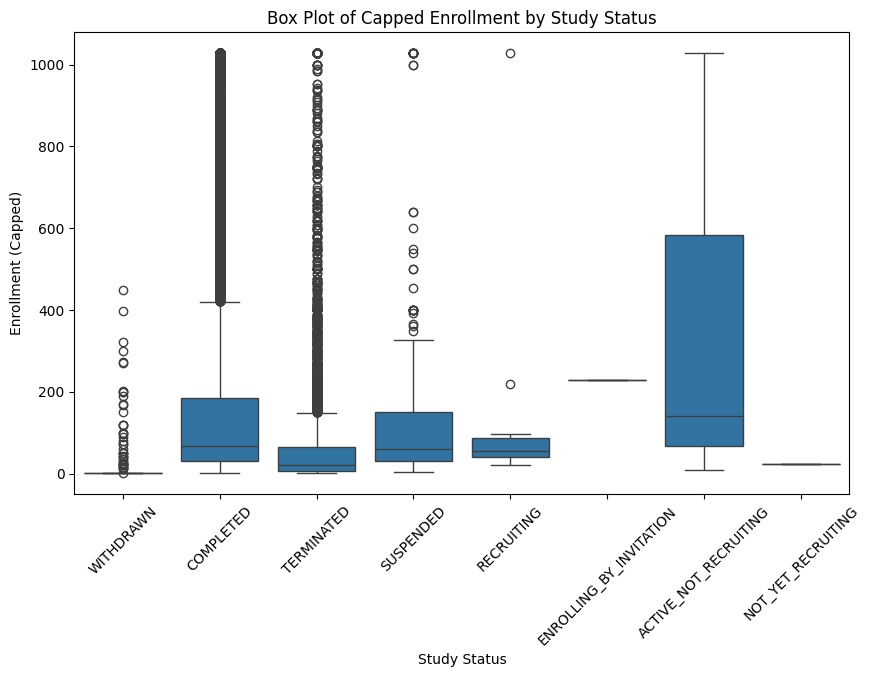

In [ ]:
# Check if the dataset is available before proceeding
if 'usecase_3' in locals():
    # Group by Study Status and apply outlier capping on Enrollment
    usecase_3['Enrollment_Capped'] = cap_outliers(usecase_3['Enrollment'])

    # Create a box plot for Enrollment categorized by Study Status
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=usecase_3['Study Status'], y=usecase_3['Enrollment_Capped'])

    # Set title and labels
    plt.title('Box Plot of Capped Enrollment by Study Status')
    plt.xlabel('Study Status')
    plt.ylabel('Enrollment (Capped)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Show plot
    plt.show()
else:
    print("Dataset 'usecase_3' not found. Please upload the dataset.")

In [ ]:
# Calculate percentage of missing Enrollment by Study Status
missing_enrollment_pct = usecase_3.groupby('Study Status')['Enrollment'].apply(lambda x: x.isna().mean() * 100)

# Convert to DataFrame for better visualization
missing_enrollment_df = missing_enrollment_pct.reset_index().rename(columns={'Enrollment': 'Missing Enrollment (%)'})

# Display the result
print(missing_enrollment_df)

              Study Status  Missing Enrollment (%)
0    ACTIVE_NOT_RECRUITING                0.000000
1                COMPLETED                1.650751
2  ENROLLING_BY_INVITATION                0.000000
3       NOT_YET_RECRUITING                0.000000
4               RECRUITING                0.000000
5                SUSPENDED                0.668896
6               TERMINATED                0.854128
7                WITHDRAWN                0.206186


In [ ]:
# Calculate median enrollment for each Study Status group
median_enrollment = usecase_3.groupby('Study Status')['Enrollment'].median()

# Fill missing values using the median of the respective Study Status group
usecase_3['Enrollment'] = usecase_3.apply(
    lambda row: median_enrollment[row['Study Status']] if pd.isna(row['Enrollment']) else row['Enrollment'], axis=1
)

In [ ]:
# usecase_3 = usecase_3.dropna(subset=['Primary Outcome Measures'])

In [ ]:
# Combine the text from the three columns, handling missing values
usecase_3['Total Outcome Measures'] = usecase_3[['Primary Outcome Measures', 'Secondary Outcome Measures', 'Other Outcome Measures']].apply(
    lambda row: ' | '.join(row.dropna().astype(str)), axis=1
)

# Drop the original columns
usecase_3.drop(columns=['Primary Outcome Measures', 'Secondary Outcome Measures', 'Other Outcome Measures'], inplace=True)

# Verify the changes
usecase_3[['Total Outcome Measures']].head()

,Total Outcome Measures
0,"Change in Radiographic Analysis, Global and Se..."
1,"pain during IUD insertion, intensity of patien..."
2,"Change of CD8+ tumor infiltrating lymphocytes,..."
3,"Toxicity Rate, This is a 2-stage clinical tria..."
4,"IL-1β level in GCF, IL-1β is a cytokine presen..."


In [ ]:
usecase_3.drop(columns=['Enrollment_Capped'], inplace=True)

In [ ]:
missing_count = usecase_3.isnull().sum()

# Percentage of missing values in each column
missing_percentage = (missing_count / len(usecase_3)) * 100

# Combine into a single DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percentage
})
missing_summary

,Missing Count,Missing Percentage (%)
NCT Number,0,0.000000
Study Title,0,0.000000
Study Status,0,0.000000
Brief Summary,0,0.000000
Conditions,0,0.000000
Sponsor,57,0.088516
Sex,0,0.000000
Age,57,0.088516
Phases,0,0.000000
Enrollment,0,0.000000


In [ ]:
# Lists of columns
columns_mode = ['Age', 'Sex']
columns_unknown = ['Funder Type', 'Study Type', 'Study Design', 'Total Outcome Measures']

# Fill numerical columns with median
for col in columns_mode:
    mode_value = usecase_3[col].mode()
    usecase_3[col].fillna(mode_value, inplace=True)

# Fill categorical columns with 'unknown'
for col in columns_unknown:
    usecase_3[col].fillna('Unknown', inplace=True)

<ipython-input-96-38bf8a56e25f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  usecase_3[col].fillna(mode_value, inplace=True)
<ipython-input-96-38bf8a56e25f>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
usecase_3.head()

,NCT Number,Study Title,Study Status,Brief Summary,Conditions,Sponsor,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Start Month,Start Quarter,Conditions_Category,Locations,Num_Collaborators,Collaborator_Type,Total Outcome Measures
0,NCT03162666,Patient Outcomes Using an Expandable Spacer,WITHDRAWN,This study is a post-market clinical follow-up...,Degenerative Disc Disease,Globus Medical Inc,ALL,"ADULT, OLDER_ADULT",PHASE2,0.0,INDUSTRY,OBSERVATIONAL,Observational Model: |Time Perspective: p,2,1,Non-Oncology,"Rush University Medical Center, Chicago, Illin...",0,Unknown,"Change in Radiographic Analysis, Global and Se..."
1,NCT04312048,the Effect of Isosorbide Mononitrate in Reduci...,COMPLETED,The aim of the study is to evaluate the effica...,IUD Insertion Pain,Cairo University,FEMALE,"CHILD, ADULT, OLDER_ADULT",PHASE3,110.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,4,2,Non-Oncology,"Ahmed Samy, Giza, 11231, Egypt",0,Unknown,"pain during IUD insertion, intensity of patien..."
2,NCT03144778,Durvalumab With or Without Tremelimumab in Tre...,COMPLETED,This phase I trial studies how well durvalumab...,Stage II Oropharyngeal Squamous Cell Carcinoma...,M.D. Anderson Cancer Center,ALL,"ADULT, OLDER_ADULT",PHASE1,39.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,7,3,Oncology,"M D Anderson Cancer Center, Houston, Texas, 77...",1,Government,"Change of CD8+ tumor infiltrating lymphocytes,..."
3,NCT01592721,Radiation and Cetuximab Plus Intratumoral EGFR...,COMPLETED,The incorporation of novel targeted therapies ...,Squamous Cell Carcinoma|Head and Neck Cancer,The University of Texas Health Science Center ...,ALL,"ADULT, OLDER_ADULT",PHASE1.5,6.0,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,4,2,Oncology,"University of Pittsburgh, Pittsburgh, Pennsylv...",1,University,"Toxicity Rate, This is a 2-stage clinical tria..."
4,NCT04253613,Laser Biostimulation in Periodontal Treatment,COMPLETED,"The use of nonsurgical periodontal treatment, ...",Periodontal Inflammation|Periodontal Diseases,Ondokuz Mayıs University,MALE,"ADULT, OLDER_ADULT",PHASE2,30.0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,1,1,Non-Oncology,NaN,0,Unknown,"IL-1β level in GCF, IL-1β is a cytokine presen..."


In [ ]:
pd.DataFrame(usecase_3.Conditions.value_counts()).head(50)

,count
Conditions,
Healthy,1462
Breast Cancer,579
Prostate Cancer,392
Asthma,387
Obesity,364
HIV Infections,332
Healthy Volunteers,318
Hypertension,267
"Diabetes Mellitus, Type 2",264


In [ ]:
# Define a function to classify conditions with detailed categories
def classify_condition(condition):
    if pd.isnull(condition):
        return 'Unknown'

    condition_lower = condition.lower()

    # Cancer-related conditions
    if any(keyword in condition_lower for keyword in ['cancer', 'tumor', 'carcinoma', 'lymphoma', 'leukemia', 'melanoma']):
        return 'Cancer'

    # Cardiovascular diseases
    if any(keyword in condition_lower for keyword in ['heart', 'cardio', 'vascular', 'stroke', 'artery', 'hypertension', 'atrial']):
        return 'Cardiovascular'

    # Neurological disorders
    if any(keyword in condition_lower for keyword in ['brain', 'neuro', 'alzheimer', 'parkinson', 'epilepsy', 'multiple sclerosis']):
        return 'Neurological'

    # Infectious diseases
    if any(keyword in condition_lower for keyword in ['infection', 'virus', 'bacterial', 'hiv', 'malaria', 'covid', 'influenza']):
        return 'Infectious Diseases'

    # Endocrine and metabolic disorders
    if any(keyword in condition_lower for keyword in ['diabetes', 'thyroid', 'obesity', 'metabolic', 'insulin']):
        return 'Endocrine/Metabolic'

    # Respiratory conditions
    if any(keyword in condition_lower for keyword in ['asthma', 'lung', 'copd', 'pulmonary']):
        return 'Respiratory'

    # Gastrointestinal & Hepatic diseases
    if any(keyword in condition_lower for keyword in ['liver', 'hepatic', 'pancreatic', 'colorectal', 'gastro']):
        return 'Gastrointestinal & Hepatic'

    # Autoimmune and inflammatory conditions
    if any(keyword in condition_lower for keyword in ['arthritis', 'rheumatoid', 'psoriasis', 'inflammatory', 'lupus', 'crohn']):
        return 'Autoimmune & Inflammatory'

    # Musculoskeletal disorders
    if any(keyword in condition_lower for keyword in ['osteoporosis', 'osteoarthritis', 'fracture', 'spine', 'back pain', 'knee']):
        return 'Musculoskeletal'

    # Psychiatric & behavioral disorders
    if any(keyword in condition_lower for keyword in ['schizophrenia', 'bipolar', 'depression', 'psychiatric', 'mental health']):
        return 'Psychiatric & Behavioral'

    # Reproductive & urological disorders
    if any(keyword in condition_lower for keyword in ['infertility', 'prostate', 'kidney', 'renal', 'bladder', 'reproductive']):
        return 'Reproductive & Urological'

    # General health & other
    if any(keyword in condition_lower for keyword in ['healthy', 'general health', 'volunteers']):
        return 'General Health & Others'

    # Default to "Other" for unspecified conditions
    return 'Other'

# Apply the improved classification function
usecase_3['Condition_Category_old'] = usecase_3['Conditions'].apply(classify_condition)

# Verify results
usecase_3[['Conditions', 'Condition_Category_old']].head(20)

,Conditions,Condition_Category_old
0,Degenerative Disc Disease,Other
1,IUD Insertion Pain,Other
2,Stage II Oropharyngeal Squamous Cell Carcinoma...,Cancer
3,Squamous Cell Carcinoma|Head and Neck Cancer,Cancer
4,Periodontal Inflammation|Periodontal Diseases,Other
5,Peripheral Artery Disease,Cardiovascular
6,Cardiovascular Risk Factor|Heart Diseases|Infl...,Cardiovascular
7,Healthy,General Health & Others
8,Parkinson's Disease|With Inclusion Criteria fo...,Neurological
9,Urinary Tract Infections,Infectious Diseases


In [ ]:
usecase_3.Condition_Category_old.value_counts()

,count
Condition_Category_old,
Other,30180
Cancer,8989
Cardiovascular,4666
Infectious Diseases,3970
Endocrine/Metabolic,3648
General Health & Others,2605
Neurological,2328
Autoimmune & Inflammatory,1741
Respiratory,1619


In [ ]:
# usecase_3.drop(columns=['Conditions'], inplace=True)

In [ ]:
# Define a function to classify sponsors
def classify_sponsor(sponsor):
    if pd.isnull(sponsor):
        return 'Unknown'
    sponsor_lower = sponsor.lower()

    # University
    if 'university' in sponsor_lower or 'school of medicine' in sponsor_lower:
        return 'University'

    # Hospital or Clinic
    if 'hospital' in sponsor_lower or 'clinic' in sponsor_lower or 'center' in sponsor_lower:
        return 'Hospital/Clinic'

    # Company
    company_keywords = ['pharmaceuticals', 'biopharma', 'biosciences', 'llc', 'inc',
                         'company', 'a/s', 'ltd', 'plc', 'corporation']
    if any(keyword in sponsor_lower for keyword in company_keywords):
        return 'Company'

    # Government Institute
    gov_keywords = ['national', 'institute', 'office of research', 'va', 'nci', 'niaid']
    if any(keyword in sponsor_lower for keyword in gov_keywords):
        return 'Government Institute'

    # Other
    return 'Other'

# Apply the classification function to the Sponsor column
usecase_3['Sponsor Type'] = usecase_3['Sponsor'].apply(classify_sponsor)
usecase_3.drop(columns=['Sponsor'], inplace=True)
# Verify the distribution of Sponsor Type
print(usecase_3['Sponsor Type'].value_counts())

Sponsor Type
University              23001
Other                   18981
Hospital/Clinic          8889
Company                  8589
Government Institute     4878
Unknown                    57
Name: count, dtype: int64


In [ ]:
usecase_3.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Conditions', 'Sex', 'Age', 'Phases', 'Enrollment', 'Funder Type',
       'Study Type', 'Study Design', 'Start Month', 'Start Quarter',
       'Conditions_Category', 'Locations', 'Num_Collaborators',
       'Collaborator_Type', 'Total Outcome Measures', 'Condition_Category_old',
       'Sponsor Type'],
      dtype='object')

In [ ]:
# Define the unique age categories
age_categories = ['CHILD', 'ADULT', 'OLDER_ADULT']

# Create binary columns for each age group
for category in age_categories:
    usecase_3[category] = usecase_3['Age'].apply(lambda x: 1 if isinstance(x, str) and category in x else 0)

# Drop the original 'Age' column
usecase_3.drop(columns=['Age'], inplace=True)

# Display the modified DataFrame
usecase_3.head()

,NCT Number,Study Title,Study Status,Brief Summary,Conditions,Sex,Phases,Enrollment,Funder Type,Study Type,...,Conditions_Category,Locations,Num_Collaborators,Collaborator_Type,Total Outcome Measures,Condition_Category_old,Sponsor Type,CHILD,ADULT,OLDER_ADULT
0,NCT03162666,Patient Outcomes Using an Expandable Spacer,WITHDRAWN,This study is a post-market clinical follow-up...,Degenerative Disc Disease,ALL,PHASE2,0.0,INDUSTRY,OBSERVATIONAL,...,Non-Oncology,"Rush University Medical Center, Chicago, Illin...",0,Unknown,"Change in Radiographic Analysis, Global and Se...",Other,Company,0,1,1
1,NCT04312048,the Effect of Isosorbide Mononitrate in Reduci...,COMPLETED,The aim of the study is to evaluate the effica...,IUD Insertion Pain,FEMALE,PHASE3,110.0,OTHER,INTERVENTIONAL,...,Non-Oncology,"Ahmed Samy, Giza, 11231, Egypt",0,Unknown,"pain during IUD insertion, intensity of patien...",Other,University,1,1,1
2,NCT03144778,Durvalumab With or Without Tremelimumab in Tre...,COMPLETED,This phase I trial studies how well durvalumab...,Stage II Oropharyngeal Squamous Cell Carcinoma...,ALL,PHASE1,39.0,OTHER,INTERVENTIONAL,...,Oncology,"M D Anderson Cancer Center, Houston, Texas, 77...",1,Government,"Change of CD8+ tumor infiltrating lymphocytes,...",Cancer,Hospital/Clinic,0,1,1
3,NCT01592721,Radiation and Cetuximab Plus Intratumoral EGFR...,COMPLETED,The incorporation of novel targeted therapies ...,Squamous Cell Carcinoma|Head and Neck Cancer,ALL,PHASE1.5,6.0,OTHER,INTERVENTIONAL,...,Oncology,"University of Pittsburgh, Pittsburgh, Pennsylv...",1,University,"Toxicity Rate, This is a 2-stage clinical tria...",Cancer,University,0,1,1
4,NCT04253613,Laser Biostimulation in Periodontal Treatment,COMPLETED,"The use of nonsurgical periodontal treatment, ...",Periodontal Inflammation|Periodontal Diseases,MALE,PHASE2,30.0,OTHER,OBSERVATIONAL,...,Non-Oncology,NaN,0,Unknown,"IL-1β level in GCF, IL-1β is a cytokine presen...",Other,University,0,1,1


In [ ]:
usecase_3.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Conditions', 'Sex', 'Phases', 'Enrollment', 'Funder Type',
       'Study Type', 'Study Design', 'Start Month', 'Start Quarter',
       'Conditions_Category', 'Locations', 'Num_Collaborators',
       'Collaborator_Type', 'Total Outcome Measures', 'Condition_Category_old',
       'Sponsor Type', 'CHILD', 'ADULT', 'OLDER_ADULT'],
      dtype='object')

In [ ]:
usecase_3['Study Design'].value_counts().head(50)

,count
Study Design,
Observational Model: |Time Perspective: p,13322
Allocation: NA|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: TREATMENT,6571
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT,5300
"Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT",3159
"Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (PARTICIPANT, INVESTIGATOR)|Primary Purpose: TREATMENT",2100
Allocation: NON_RANDOMIZED|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: TREATMENT,1574
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT,1480
Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: PREVENTION,1271
Allocation: NON_RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT,1198


In [ ]:
# Function to extract attribute values
def extract_attribute(study_design, attribute):
    if pd.isnull(study_design):
        return None
    for part in study_design.split('|'):
        if attribute in part:
            return part.split(':')[1].strip() if ':' in part else None
    return None

# Extract key features
usecase_3['Allocation'] = usecase_3['Study Design'].apply(lambda x: extract_attribute(x, 'Allocation'))
usecase_3['Intervention Model'] = usecase_3['Study Design'].apply(lambda x: extract_attribute(x, 'Intervention Model'))
usecase_3['Masking'] = usecase_3['Study Design'].apply(lambda x: extract_attribute(x, 'Masking'))
usecase_3['Primary Purpose'] = usecase_3['Study Design'].apply(lambda x: extract_attribute(x, 'Primary Purpose'))
usecase_3['Observational Model'] = usecase_3['Study Design'].apply(lambda x: extract_attribute(x, 'Observational Model'))
usecase_3['Time Perspective'] = usecase_3['Study Design'].apply(lambda x: extract_attribute(x, 'Time Perspective'))

# Extract Masking Level
def extract_masking_level(masking):
    if pd.isnull(masking):
        return 'NONE'
    if 'QUADRUPLE' in masking:
        return 'QUADRUPLE'
    if 'TRIPLE' in masking:
        return 'TRIPLE'
    if 'DOUBLE' in masking:
        return 'DOUBLE'
    if 'SINGLE' in masking:
        return 'SINGLE'
    return 'NONE'

usecase_3['Masking Level'] = usecase_3['Masking'].apply(extract_masking_level)

# Extract Masking Details
def extract_masking_details(masking):
    if pd.isnull(masking):
        return 'NONE'
    if '(' in masking:
        return masking.split('(')[1].strip(')')
    return 'NONE'

usecase_3['Masking Details'] = usecase_3['Masking'].apply(extract_masking_details)

# Handle missing values by filling with 'Unknown'
usecase_3['Allocation'].fillna('Unknown', inplace=True)
usecase_3['Intervention Model'].fillna('Unknown', inplace=True)
usecase_3['Primary Purpose'].fillna('Unknown', inplace=True)
usecase_3['Observational Model'].fillna('Unknown', inplace=True)
usecase_3['Time Perspective'].fillna('Unknown', inplace=True)

# One-hot encode categorical features
usecase_3 = pd.get_dummies(
    usecase_3,
    columns=['Allocation', 'Intervention Model', 'Masking Level', 'Primary Purpose']
)

# Drop original 'Study Design' column
# usecase_3.drop(columns=['Study Design'], inplace=True)
usecase_3.head()

<ipython-input-107-1b546c0c6168>:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  usecase_3['Allocation'].fillna('Unknown', inplace=True)
<ipython-input-107-1b546c0c6168>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,NCT Number,Study Title,Study Status,Brief Summary,Conditions,Sex,Phases,Enrollment,Funder Type,Study Type,...,Primary Purpose_DEVICE_FEASIBILITY,Primary Purpose_DIAGNOSTIC,Primary Purpose_ECT,Primary Purpose_HEALTH_SERVICES_RESEARCH,Primary Purpose_OTHER,Primary Purpose_PREVENTION,Primary Purpose_SCREENING,Primary Purpose_SUPPORTIVE_CARE,Primary Purpose_TREATMENT,Primary Purpose_Unknown
0,NCT03162666,Patient Outcomes Using an Expandable Spacer,WITHDRAWN,This study is a post-market clinical follow-up...,Degenerative Disc Disease,ALL,PHASE2,0.0,INDUSTRY,OBSERVATIONAL,...,False,False,False,False,False,False,False,False,False,True
1,NCT04312048,the Effect of Isosorbide Mononitrate in Reduci...,COMPLETED,The aim of the study is to evaluate the effica...,IUD Insertion Pain,FEMALE,PHASE3,110.0,OTHER,INTERVENTIONAL,...,False,False,False,False,False,True,False,False,False,False
2,NCT03144778,Durvalumab With or Without Tremelimumab in Tre...,COMPLETED,This phase I trial studies how well durvalumab...,Stage II Oropharyngeal Squamous Cell Carcinoma...,ALL,PHASE1,39.0,OTHER,INTERVENTIONAL,...,False,False,False,False,False,False,False,False,True,False
3,NCT01592721,Radiation and Cetuximab Plus Intratumoral EGFR...,COMPLETED,The incorporation of novel targeted therapies ...,Squamous Cell Carcinoma|Head and Neck Cancer,ALL,PHASE1.5,6.0,OTHER,INTERVENTIONAL,...,False,False,False,False,False,False,False,False,True,False
4,NCT04253613,Laser Biostimulation in Periodontal Treatment,COMPLETED,"The use of nonsurgical periodontal treatment, ...",Periodontal Inflammation|Periodontal Diseases,MALE,PHASE2,30.0,OTHER,OBSERVATIONAL,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
print(usecase_3.columns.tolist())

['NCT Number', 'Study Title', 'Study Status', 'Brief Summary', 'Conditions', 'Sex', 'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design', 'Start Month', 'Start Quarter', 'Conditions_Category', 'Locations', 'Num_Collaborators', 'Collaborator_Type', 'Total Outcome Measures', 'Condition_Category_old', 'Sponsor Type', 'CHILD', 'ADULT', 'OLDER_ADULT', 'Masking', 'Observational Model', 'Time Perspective', 'Masking Details', 'Allocation_', 'Allocation_NA', 'Allocation_NON_RANDOMIZED', 'Allocation_RANDOMIZED', 'Allocation_Unknown', 'Intervention Model_', 'Intervention Model_CROSSOVER', 'Intervention Model_FACTORIAL', 'Intervention Model_PARALLEL', 'Intervention Model_SEQUENTIAL', 'Intervention Model_SINGLE_GROUP', 'Intervention Model_Unknown', 'Masking Level_DOUBLE', 'Masking Level_NONE', 'Masking Level_QUADRUPLE', 'Masking Level_SINGLE', 'Masking Level_TRIPLE', 'Primary Purpose_', 'Primary Purpose_BASIC_SCIENCE', 'Primary Purpose_DEVICE_FEASIBILITY', 'Primary Purpose_DIAGNOSTIC

In [ ]:
# Fill NaN values with empty strings before concatenation
usecase_3['Combined_Text'] = (
    usecase_3['Study Title'].fillna('') + ' ' +
    usecase_3['Brief Summary'].fillna('') + ' ' +
    usecase_3['Total Outcome Measures'].fillna('')
)

In [ ]:
import nltk

# Download wordnet and stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')  # Required for wordnet lemmatizer
nltk.download('stopwords')  # Ensure stopwords are available

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk

# Download necessary resources
nltk.download('punkt')  # Tokenizer
nltk.download('averaged_perceptron_tagger')  # POS tagging
nltk.download('wordnet')  # Lemmatization
nltk.download('stopwords')  # Stopwords
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
list(usecase_3.columns)

['NCT Number',
 'Study Title',
 'Study Status',
 'Brief Summary',
 'Conditions',
 'Sex',
 'Phases',
 'Enrollment',
 'Funder Type',
 'Study Type',
 'Study Design',
 'Start Month',
 'Start Quarter',
 'Conditions_Category',
 'Locations',
 'Num_Collaborators',
 'Collaborator_Type',
 'Total Outcome Measures',
 'Condition_Category_old',
 'Sponsor Type',
 'CHILD',
 'ADULT',
 'OLDER_ADULT',
 'Masking',
 'Observational Model',
 'Time Perspective',
 'Masking Details',
 'Allocation_',
 'Allocation_NA',
 'Allocation_NON_RANDOMIZED',
 'Allocation_RANDOMIZED',
 'Allocation_Unknown',
 'Intervention Model_',
 'Intervention Model_CROSSOVER',
 'Intervention Model_FACTORIAL',
 'Intervention Model_PARALLEL',
 'Intervention Model_SEQUENTIAL',
 'Intervention Model_SINGLE_GROUP',
 'Intervention Model_Unknown',
 'Masking Level_DOUBLE',
 'Masking Level_NONE',
 'Masking Level_QUADRUPLE',
 'Masking Level_SINGLE',
 'Masking Level_TRIPLE',
 'Primary Purpose_',
 'Primary Purpose_BASIC_SCIENCE',
 'Primary Purpose_DE

In [ ]:
import re

# List of 195 countries from the dataset
country_list = [
    "India", "China", "United States", "Indonesia", "Pakistan", "Nigeria", "Brazil", "Bangladesh", "Russia",
    "Ethiopia", "Mexico", "Japan", "Egypt", "Philippines", "DR Congo", "Vietnam", "Iran", "Turkey", "Germany",
    "Thailand", "United Kingdom", "Tanzania", "France", "South Africa", "Italy", "Kenya", "Myanmar", "Colombia",
    "Korea", "Sudan", "Uganda", "Spain", "Algeria", "Iraq", "Argentina", "Afghanistan", "Yemen", "Canada",
    "Poland", "Morocco", "Angola", "Ukraine", "Uzbekistan", "Malaysia", "Mozambique", "Ghana", "Peru", "Saudi Arabia",
    "Madagascar", "Côte D'Ivoire", "Nepal", "Cameroon", "Venezuela", "Niger", "Australia", "North Korea", "Syria",
    "Mali", "Burkina Faso", "Sri Lanka", "Malawi", "Zambia", "Kazakhstan", "Chad", "Chile", "Romania", "Somalia",
    "Senegal", "Guatemala", "Netherlands", "Ecuador", "Cambodia", "Zimbabwe", "Guinea", "Benin", "Rwanda", "Burundi",
    "Bolivia", "Tunisia", "South Sudan", "Haiti", "Belgium", "Jordan", "Dominican Republic", "United Arab Emirates",
    "Cuba", "Honduras", "Czech Republic", "Sweden", "Tajikistan", "Papua New Guinea", "Portugal", "Azerbaijan",
    "Greece", "Hungary", "Togo", "Israel", "Austria", "Belarus", "Switzerland", "Sierra Leone", "Laos", "Turkmenistan",
    "Libya", "Kyrgyzstan", "Paraguay", "Nicaragua", "Bulgaria", "Serbia", "El Salvador", "Congo", "Denmark",
    "Singapore", "Lebanon", "Finland", "Liberia", "Norway", "Slovakia", "State of Palestine",
    "Central African Republic", "Oman", "Ireland", "New Zealand", "Mauritania", "Costa Rica", "Kuwait", "Panama",
    "Croatia", "Georgia", "Eritrea", "Mongolia", "Uruguay", "Bosnia and Herzegovina", "Qatar", "Moldova", "Namibia",
    "Armenia", "Lithuania", "Jamaica", "Albania", "Gambia", "Gabon", "Botswana", "Lesotho", "Guinea-Bissau",
    "Slovenia", "Equatorial Guinea", "Latvia", "North Macedonia", "Bahrain", "Trinidad and Tobago", "Timor-Leste",
    "Estonia", "Cyprus", "Mauritius", "Eswatini", "Djibouti", "Fiji", "Comoros", "Guyana", "Solomon Islands",
    "Bhutan", "Luxembourg", "Montenegro", "Suriname", "Malta", "Maldives", "Micronesia", "Cabo Verde", "Brunei",
    "Belize", "Bahamas", "Iceland", "Vanuatu", "Barbados", "Sao Tome & Principe", "Samoa", "Saint Lucia", "Kiribati",
    "Seychelles", "Grenada", "Tonga", "St. Vincent & Grenadines", "Antigua and Barbuda", "Andorra", "Dominica",
    "Saint Kitts & Nevis", "Liechtenstein", "Monaco", "Marshall Islands", "San Marino", "Palau", "Nauru", "Tuvalu",
    "Holy See","Taiwan","Hong Kong","Czechia","Puerto Rico","Palestinian Territory","Swaziland","Faroe Islands","Réunion","Yugoslavia","French Guiana","Lao People's Democratic Republic","The Former Yugoslav Republic of","GSK Investigational Site","Guadeloupe","French Polynesia","Kosovo","Macau","Guam","Greenland","Saint Kitts and Nevis", "New Caledonia", "Northern Mariana Islands", "New Caledonia", "Novartis Investigative Site", "Palestinian Territories", "Cayman Islands"
]


# Function to extract state and country from location text
def extract_state_country(location):
    location = str(location)  # Ensure it's a string
    country = None
    state = None

    # Extract country from location text
    for c in country_list:
        if c in location:
            country = c
            break

    # Extract state (for US locations)
    location_parts = re.split(r'[|,]', location)  # Split by '|' or ','
    for part in location_parts:
        part = part.strip()
    return country

# Apply function to extract state and country
usecase_3[['Country']] = usecase_3['Locations'].apply(lambda x: pd.Series(extract_state_country(x)))

# Display results
usecase_3.head()

,NCT Number,Study Title,Study Status,Brief Summary,Conditions,Sex,Phases,Enrollment,Funder Type,Study Type,...,Primary Purpose_ECT,Primary Purpose_HEALTH_SERVICES_RESEARCH,Primary Purpose_OTHER,Primary Purpose_PREVENTION,Primary Purpose_SCREENING,Primary Purpose_SUPPORTIVE_CARE,Primary Purpose_TREATMENT,Primary Purpose_Unknown,Combined_Text,Country
0,NCT03162666,Patient Outcomes Using an Expandable Spacer,WITHDRAWN,This study is a post-market clinical follow-up...,Degenerative Disc Disease,ALL,PHASE2,0.0,INDUSTRY,OBSERVATIONAL,...,False,False,False,False,False,False,False,True,Patient Outcomes Using an Expandable Spacer Th...,United States
1,NCT04312048,the Effect of Isosorbide Mononitrate in Reduci...,COMPLETED,The aim of the study is to evaluate the effica...,IUD Insertion Pain,FEMALE,PHASE3,110.0,OTHER,INTERVENTIONAL,...,False,False,False,True,False,False,False,False,the Effect of Isosorbide Mononitrate in Reduci...,Egypt
2,NCT03144778,Durvalumab With or Without Tremelimumab in Tre...,COMPLETED,This phase I trial studies how well durvalumab...,Stage II Oropharyngeal Squamous Cell Carcinoma...,ALL,PHASE1,39.0,OTHER,INTERVENTIONAL,...,False,False,False,False,False,False,True,False,Durvalumab With or Without Tremelimumab in Tre...,United States
3,NCT01592721,Radiation and Cetuximab Plus Intratumoral EGFR...,COMPLETED,The incorporation of novel targeted therapies ...,Squamous Cell Carcinoma|Head and Neck Cancer,ALL,PHASE1.5,6.0,OTHER,INTERVENTIONAL,...,False,False,False,False,False,False,True,False,Radiation and Cetuximab Plus Intratumoral EGFR...,United States
4,NCT04253613,Laser Biostimulation in Periodontal Treatment,COMPLETED,"The use of nonsurgical periodontal treatment, ...",Periodontal Inflammation|Periodontal Diseases,MALE,PHASE2,30.0,OTHER,OBSERVATIONAL,...,False,False,False,False,False,False,False,True,Laser Biostimulation in Periodontal Treatment ...,NaN


In [ ]:
usecase_3.Country.isna().sum()

6052

In [ ]:
usecase_3.Country.isnull().sum()

6052

In [ ]:
usecase_3.Country.value_counts()

,count
Country,
United States,23614
France,3149
India,2698
China,2482
Germany,2352
...,...
Palestinian Territories,1
Brunei,1
Nicaragua,1


In [ ]:
usecase_3.Country.fillna('Unknown', inplace=True)

<ipython-input-117-af56f50d844f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  usecase_3.Country.fillna('Unknown', inplace=True)


In [ ]:
developed = [
    "United States", "Canada", "Germany", "Japan", "United Kingdom", "France", "Switzerland",
    "Netherlands", "Sweden", "Denmark", "Norway", "Finland", "Australia", "New Zealand", "Belgium",
    "Austria", "Ireland", "Singapore", "Hong Kong", "Taiwan", "Israel", "Luxembourg",
    "Iceland", "Czech Republic", "Estonia", "Slovenia", "Portugal","Spain", "Italy", "Czechia", "Korea"
]

developing = [
    "India", "China", "Brazil", "Russia", "Mexico", "South Africa", "Indonesia", "Malaysia", "Turkey",
    "Argentina", "Thailand", "Vietnam", "Chile", "Colombia", "Poland", "Hungary", "Slovakia", "Lithuania",
    "Latvia", "Kazakhstan", "Bulgaria", "Romania", "Peru", "Uruguay", "Panama", "United Arab Emirates",
    "Costa Rica", "Qatar", "Oman", "Saudi Arabia", "Malta", "Bahrain", "Kuwait","Egypt", "Pakistan", "Ethiopia", "Iraq", "Kenya", "Jordan", "Iran",
    "Cameroon", "Greece", "Philippines", "Tanzania", "Kyrgyzstan", "Senegal", "Tunisia",
    "Belarus", "Croatia", "Cyprus", "Lebanon", "Ghana", "Mauritius", "Jamaica", "Uganda",
    "Serbia", "Armenia", "Guatemala", "Ukraine", "Nigeria", "Algeria", "Cuba", "Bolivia",
    "El Salvador", "Bosnia and Herzegovina", "Venezuela", "Moldova", "Georgia", "Paraguay",
    "Botswana", "Morocco", "Sri Lanka", "Trinidad and Tobago", "Brunei", "Uzbekistan",
    "Honduras", "Ecuador", "Bhutan", "Montenegro", "Albania", "Fiji", "Bahamas", "Suriname",
    "North Macedonia", "Nicaragua", "Mongolia", "Azerbaijan"
]

underdeveloped = [
    "Afghanistan", "Yemen", "Sudan", "Chad", "Somalia", "South Sudan", "Democratic Republic of Congo",
    "Haiti", "Burundi", "Liberia", "Sierra Leone", "Mozambique", "Madagascar", "Central African Republic",
    "Eritrea", "Niger", "Mali", "Burkina Faso", "Guinea", "Guinea-Bissau", "Gambia", "Comoros", "Zambia",
    "Zimbabwe", "Nepal", "Bangladesh", "Myanmar", "Papua New Guinea", "Rwanda", "Congo", "Syria", "Malawi", "Benin", "Gabon", "Cambodia", "Lesotho", "Dominican Republic",
    "Lao People's Democratic Republic", "Namibia", "Guyana", "Libya"
]
#Other Institutions (Territories, Former Countries, and Research Sites)
other_institutions = [
    "Puerto Rico", "Palestinian Territory", "Réunion", "French Guiana", "Macau", "Guadeloupe",
    "Kosovo", "Guam", "Greenland", "French Polynesia", "Faroe Islands", "Saint Kitts and Nevis",
    "Andorra", "San Marino", "Micronesia", "Solomon Islands", "Vanuatu", "Samoa", "Saint Lucia",
    "Grenada", "Barbados", "Antigua and Barbuda", "Liechtenstein", "GSK Investigational Site",
    "Yugoslavia", "The Former Yugoslav Republic of", "New Caledonia", "Northern Mariana Islands", "New Caledonia", "Novartis Investigative Site", "Palestinian Territories", "Cayman Islands","Monaco", "Côte D'Ivoire", "Swaziland"
]


# Define category mappings
def categorize_country(country):
    if country in developed:
        return "Developed"
    elif country in developing:
        return "Developing"
    elif country in underdeveloped:
        return "Underdeveloped"
    elif country in other_institutions:
        return "Other Institutions"
    else:
        return "Unknown"

# Apply country categorization
usecase_3['Development Category'] = usecase_3['Country'].apply(categorize_country)

In [ ]:
usecase_3.head()

,NCT Number,Study Title,Study Status,Brief Summary,Conditions,Sex,Phases,Enrollment,Funder Type,Study Type,...,Primary Purpose_HEALTH_SERVICES_RESEARCH,Primary Purpose_OTHER,Primary Purpose_PREVENTION,Primary Purpose_SCREENING,Primary Purpose_SUPPORTIVE_CARE,Primary Purpose_TREATMENT,Primary Purpose_Unknown,Combined_Text,Country,Development Category
0,NCT03162666,Patient Outcomes Using an Expandable Spacer,WITHDRAWN,This study is a post-market clinical follow-up...,Degenerative Disc Disease,ALL,PHASE2,0.0,INDUSTRY,OBSERVATIONAL,...,False,False,False,False,False,False,True,Patient Outcomes Using an Expandable Spacer Th...,United States,Developed
1,NCT04312048,the Effect of Isosorbide Mononitrate in Reduci...,COMPLETED,The aim of the study is to evaluate the effica...,IUD Insertion Pain,FEMALE,PHASE3,110.0,OTHER,INTERVENTIONAL,...,False,False,True,False,False,False,False,the Effect of Isosorbide Mononitrate in Reduci...,Egypt,Developing
2,NCT03144778,Durvalumab With or Without Tremelimumab in Tre...,COMPLETED,This phase I trial studies how well durvalumab...,Stage II Oropharyngeal Squamous Cell Carcinoma...,ALL,PHASE1,39.0,OTHER,INTERVENTIONAL,...,False,False,False,False,False,True,False,Durvalumab With or Without Tremelimumab in Tre...,United States,Developed
3,NCT01592721,Radiation and Cetuximab Plus Intratumoral EGFR...,COMPLETED,The incorporation of novel targeted therapies ...,Squamous Cell Carcinoma|Head and Neck Cancer,ALL,PHASE1.5,6.0,OTHER,INTERVENTIONAL,...,False,False,False,False,False,True,False,Radiation and Cetuximab Plus Intratumoral EGFR...,United States,Developed
4,NCT04253613,Laser Biostimulation in Periodontal Treatment,COMPLETED,"The use of nonsurgical periodontal treatment, ...",Periodontal Inflammation|Periodontal Diseases,MALE,PHASE2,30.0,OTHER,OBSERVATIONAL,...,False,False,False,False,False,False,True,Laser Biostimulation in Periodontal Treatment ...,Unknown,Unknown


In [ ]:
usecase_3['Development Category'].isna().sum()

0

In [ ]:
usecase_3['Development Category'].isnull().sum()

0

In [ ]:
test_with_pred = pd.read_csv('/content/drive/My Drive/NEST/Data/FINAL/BERT_Files/test_data_with_predictions.csv') #update the path to the test_data_with_predictions.csv file that is available for download through the link in the rtf document.
test_with_pred.head()

,NCT Number,True Label,Predicted Label_study_title,Predicted Label_outcomes,Predicted Label_conditions,Predicted Label_brief_summary,Predicted Label_others,data_type,Final Prediction
0,NCT03162666,0,0,0,0,1,0.0,model_observational_non_oncology,0
1,NCT04312048,1,1,1,1,1,1.0,model_interventional_non_oncology,1
2,NCT03144778,1,0,0,0,0,0.0,model_interventional_oncology,0
3,NCT01592721,1,0,0,0,0,0.0,model_interventional_oncology,0
4,NCT04253613,1,1,1,1,1,0.0,model_observational_non_oncology,0


In [ ]:
misclassified = test_with_pred[test_with_pred["True Label"] != test_with_pred["Final Prediction"]]["NCT Number"].tolist()
correctly_classified = test_with_pred[test_with_pred["True Label"] == test_with_pred["Final Prediction"]]["NCT Number"].tolist()

In [ ]:
misclassified_df = usecase_3[usecase_3["NCT Number"].isin(misclassified)]
correctly_classified_df = usecase_3[usecase_3["NCT Number"].isin(correctly_classified)]

In [ ]:
list(misclassified_df.columns)

['NCT Number',
 'Study Title',
 'Study Status',
 'Brief Summary',
 'Conditions',
 'Sex',
 'Phases',
 'Enrollment',
 'Funder Type',
 'Study Type',
 'Study Design',
 'Start Month',
 'Start Quarter',
 'Conditions_Category',
 'Locations',
 'Num_Collaborators',
 'Collaborator_Type',
 'Total Outcome Measures',
 'Condition_Category_old',
 'Sponsor Type',
 'CHILD',
 'ADULT',
 'OLDER_ADULT',
 'Masking',
 'Observational Model',
 'Time Perspective',
 'Masking Details',
 'Allocation_',
 'Allocation_NA',
 'Allocation_NON_RANDOMIZED',
 'Allocation_RANDOMIZED',
 'Allocation_Unknown',
 'Intervention Model_',
 'Intervention Model_CROSSOVER',
 'Intervention Model_FACTORIAL',
 'Intervention Model_PARALLEL',
 'Intervention Model_SEQUENTIAL',
 'Intervention Model_SINGLE_GROUP',
 'Intervention Model_Unknown',
 'Masking Level_DOUBLE',
 'Masking Level_NONE',
 'Masking Level_QUADRUPLE',
 'Masking Level_SINGLE',
 'Masking Level_TRIPLE',
 'Primary Purpose_',
 'Primary Purpose_BASIC_SCIENCE',
 'Primary Purpose_DE

In [ ]:
# Compare study types in misclassified and correctly classified groups
study_type_misclassified = misclassified_df["Study Type"].value_counts(normalize=True)
study_type_correct = correctly_classified_df["Study Type"].value_counts(normalize=True)

print("Misclassified Study Types:\n", study_type_misclassified)
print("Correctly Classified Study Types:\n", study_type_correct)

Misclassified Study Types:
 Study Type
INTERVENTIONAL    0.81284
OBSERVATIONAL     0.18716
Name: proportion, dtype: float64
Correctly Classified Study Types:
 Study Type
INTERVENTIONAL    0.778508
OBSERVATIONAL     0.221492
Name: proportion, dtype: float64


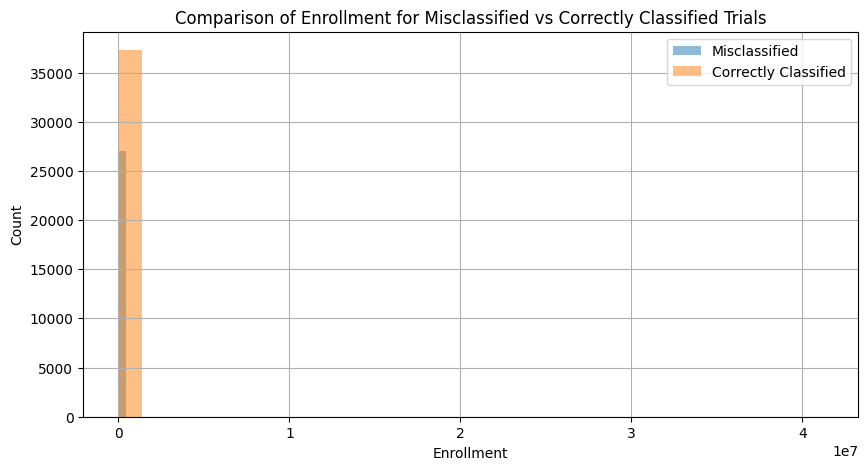

In [ ]:
import matplotlib.pyplot as plt

# Plot enrollment distribution for misclassified and correctly classified cases
plt.figure(figsize=(10, 5))
misclassified_df["Enrollment"].hist(alpha=0.5, label="Misclassified", bins=30)
correctly_classified_df["Enrollment"].hist(alpha=0.5, label="Correctly Classified", bins=30)
plt.xlabel("Enrollment")
plt.ylabel("Count")
plt.title("Comparison of Enrollment for Misclassified vs Correctly Classified Trials")
plt.legend()
plt.show()

In [ ]:
# Compare funder types
funder_misclassified = misclassified_df["Funder Type"].value_counts(normalize=True)
funder_correct = correctly_classified_df["Funder Type"].value_counts(normalize=True)

print("Misclassified Funder Types:\n", funder_misclassified)
print("Correctly Classified Funder Types:\n", funder_correct)

Misclassified Funder Types:
 Funder Type
OTHER        0.617396
INDUSTRY     0.315965
NIH          0.028475
FED          0.013683
OTHER_GOV    0.013202
NETWORK      0.009467
INDIV        0.001738
UNKNOWN      0.000037
AMBIG        0.000037
Name: proportion, dtype: float64
Correctly Classified Funder Types:
 Funder Type
OTHER        0.670349
INDUSTRY     0.257581
NIH          0.028957
OTHER_GOV    0.023487
NETWORK      0.009733
FED          0.009009
INDIV        0.000831
UNKNOWN      0.000054
Name: proportion, dtype: float64


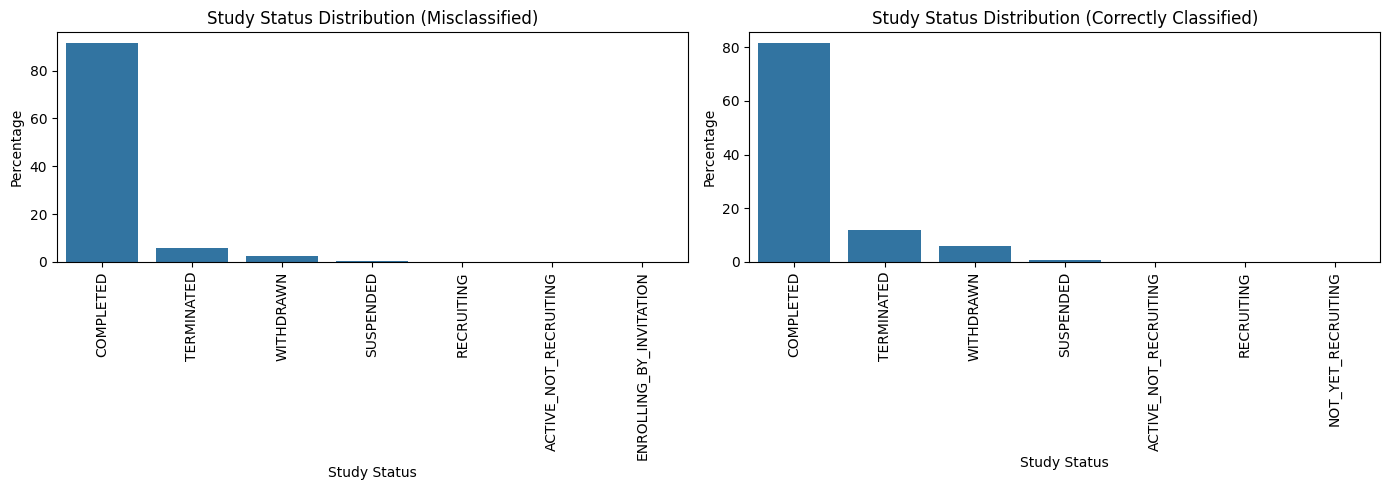

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage distribution for misclassified and correctly classified trials
misclassified_status_counts = misclassified_df["Study Status"].value_counts(normalize=True) * 100
correctly_classified_status_counts = correctly_classified_df["Study Status"].value_counts(normalize=True) * 100

# Convert to DataFrame for visualization
misclassified_status_df = misclassified_status_counts.reset_index()
misclassified_status_df.columns = ["Study Status", "Percentage"]

correctly_classified_status_df = correctly_classified_status_counts.reset_index()
correctly_classified_status_df.columns = ["Study Status", "Percentage"]

# Plot percentage distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x="Study Status", y="Percentage", data=misclassified_status_df, ax=ax[0])
ax[0].set_title("Study Status Distribution (Misclassified)")
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylabel("Percentage")

sns.barplot(x="Study Status", y="Percentage", data=correctly_classified_status_df, ax=ax[1])
ax[1].set_title("Study Status Distribution (Correctly Classified)")
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_ylabel("Percentage")

plt.tight_layout()
plt.show()

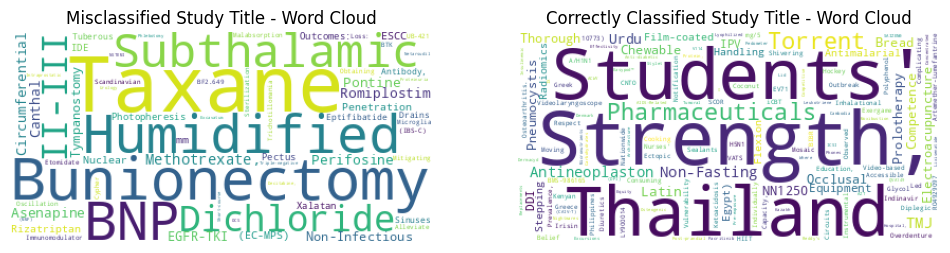

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Get text data
misclassified_text = " ".join(misclassified_df["Study Title"].dropna())
correct_text = " ".join(correctly_classified_df["Study Title"].dropna())

# Tokenize and get word frequency
misclassified_words = Counter(misclassified_text.split())
correct_words = Counter(correct_text.split())

# Find unique words in each category by removing common words
unique_misclassified_words = {word: count for word, count in misclassified_words.items() if word not in correct_words}
unique_correct_words = {word: count for word, count in correct_words.items() if word not in misclassified_words}

# Generate word clouds
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate_from_frequencies(unique_misclassified_words))
plt.axis("off")
plt.title("Misclassified Study Title - Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate_from_frequencies(unique_correct_words))
plt.axis("off")
plt.title("Correctly Classified Study Title - Word Cloud")

plt.show()

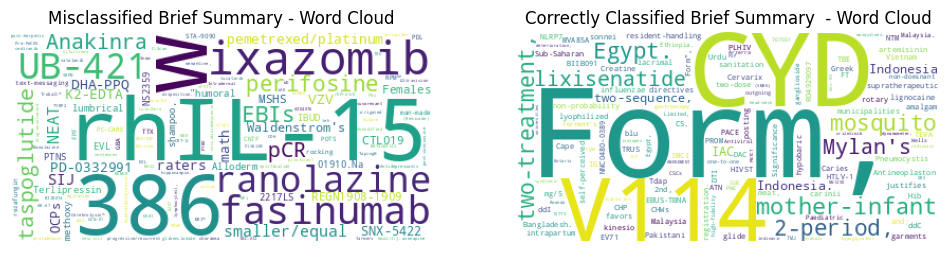

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Get text data
misclassified_text = " ".join(misclassified_df["Brief Summary"].dropna())
correct_text = " ".join(correctly_classified_df["Brief Summary"].dropna())

# Tokenize and get word frequency
misclassified_words = Counter(misclassified_text.split())
correct_words = Counter(correct_text.split())

# Find unique words in each category by removing common words
unique_misclassified_words = {word: count for word, count in misclassified_words.items() if word not in correct_words}
unique_correct_words = {word: count for word, count in correct_words.items() if word not in misclassified_words}

# Generate word clouds
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate_from_frequencies(unique_misclassified_words))
plt.axis("off")
plt.title("Misclassified Brief Summary - Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate_from_frequencies(unique_correct_words))
plt.axis("off")
plt.title("Correctly Classified Brief Summary  - Word Cloud")

plt.show()

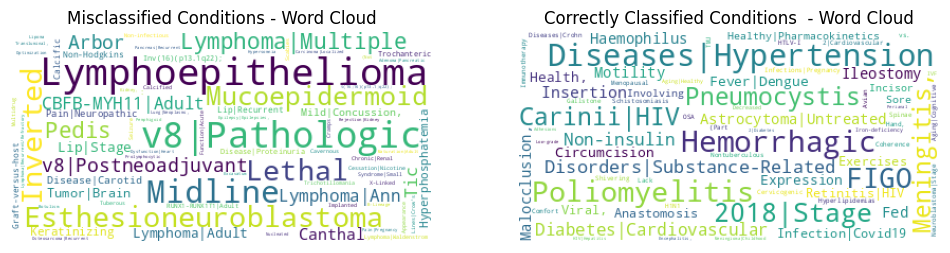

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Get text data
misclassified_text = " ".join(misclassified_df["Conditions"].dropna())
correct_text = " ".join(correctly_classified_df["Conditions"].dropna())

# Tokenize and get word frequency
misclassified_words = Counter(misclassified_text.split())
correct_words = Counter(correct_text.split())

# Find unique words in each category by removing common words
unique_misclassified_words = {word: count for word, count in misclassified_words.items() if word not in correct_words}
unique_correct_words = {word: count for word, count in correct_words.items() if word not in misclassified_words}

# Generate word clouds
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate_from_frequencies(unique_misclassified_words))
plt.axis("off")
plt.title("Misclassified Conditions - Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate_from_frequencies(unique_correct_words))
plt.axis("off")
plt.title("Correctly Classified Conditions  - Word Cloud")

plt.show()

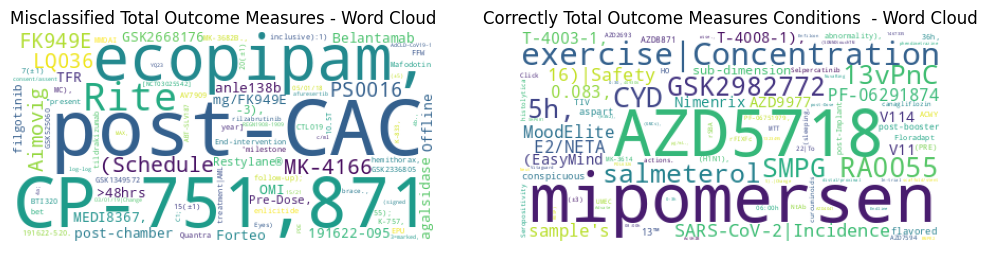

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Get text data
misclassified_text = " ".join(misclassified_df["Total Outcome Measures"].dropna())
correct_text = " ".join(correctly_classified_df["Total Outcome Measures"].dropna())

# Tokenize and get word frequency
misclassified_words = Counter(misclassified_text.split())
correct_words = Counter(correct_text.split())

# Find unique words in each category by removing common words
unique_misclassified_words = {word: count for word, count in misclassified_words.items() if word not in correct_words}
unique_correct_words = {word: count for word, count in correct_words.items() if word not in misclassified_words}

# Generate word clouds
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate_from_frequencies(unique_misclassified_words))
plt.axis("off")
plt.title("Misclassified Total Outcome Measures - Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate_from_frequencies(unique_correct_words))
plt.axis("off")
plt.title("Correctly Total Outcome Measures Conditions  - Word Cloud")

plt.show()

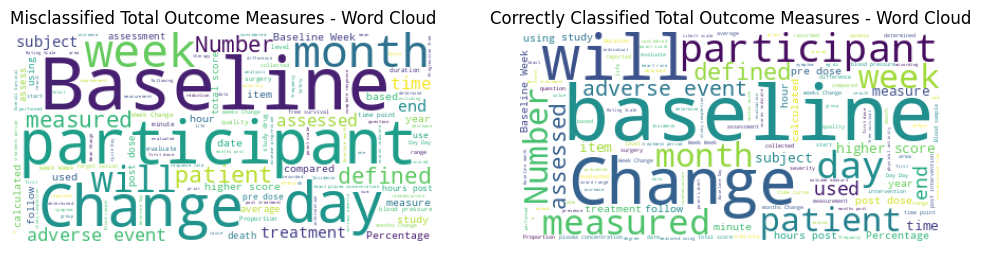

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Get text data
misclassified_text = " ".join(misclassified_df["Total Outcome Measures"].dropna())
correct_text = " ".join(correctly_classified_df["Total Outcome Measures"].dropna())

# Generate word clouds
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate(misclassified_text))
plt.axis("off")
plt.title("Misclassified Total Outcome Measures - Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate(correct_text))
plt.axis("off")
plt.title("Correctly Classified Total Outcome Measures - Word Cloud")

plt.show()

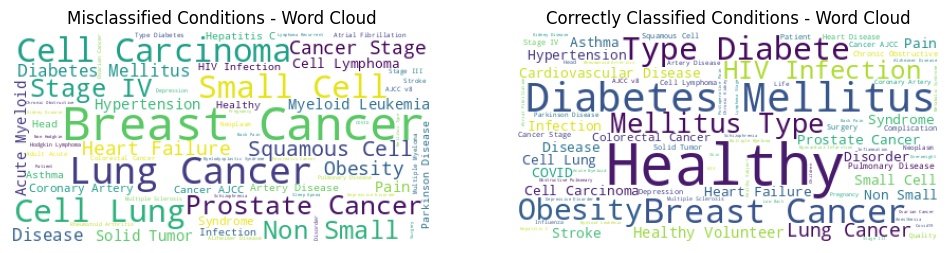

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Get text data
misclassified_text = " ".join(misclassified_df["Conditions"].dropna())
correct_text = " ".join(correctly_classified_df["Conditions"].dropna())

# Generate word clouds
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate(misclassified_text))
plt.axis("off")
plt.title("Misclassified Conditions - Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate(correct_text))
plt.axis("off")
plt.title("Correctly Classified Conditions - Word Cloud")

plt.show()

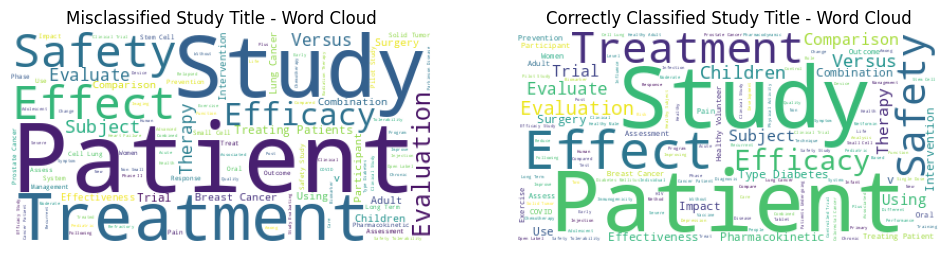

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Get text data
misclassified_text = " ".join(misclassified_df["Study Title"].dropna())
correct_text = " ".join(correctly_classified_df["Study Title"].dropna())

# Generate word clouds
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate(misclassified_text))
plt.axis("off")
plt.title("Misclassified Study Title - Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate(correct_text))
plt.axis("off")
plt.title("Correctly Classified Study Title - Word Cloud")

plt.show()

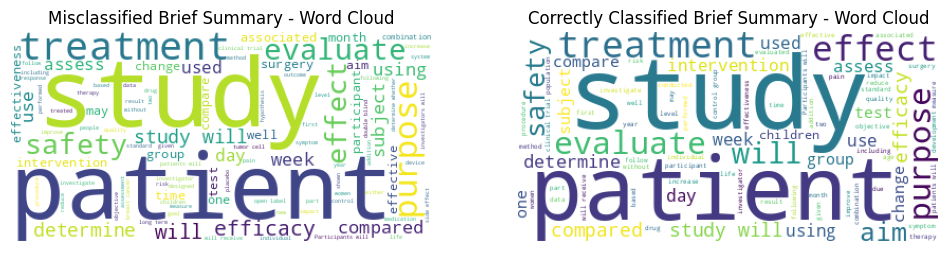

In [ ]:
from collections import Counter
from wordcloud import WordCloud

# Get text data
misclassified_text = " ".join(misclassified_df["Brief Summary"].dropna())
correct_text = " ".join(correctly_classified_df["Brief Summary"].dropna())

# Generate word clouds
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate(misclassified_text))
plt.axis("off")
plt.title("Misclassified Brief Summary - Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=200, background_color="white").generate(correct_text))
plt.axis("off")
plt.title("Correctly Classified Brief Summary - Word Cloud")

plt.show()

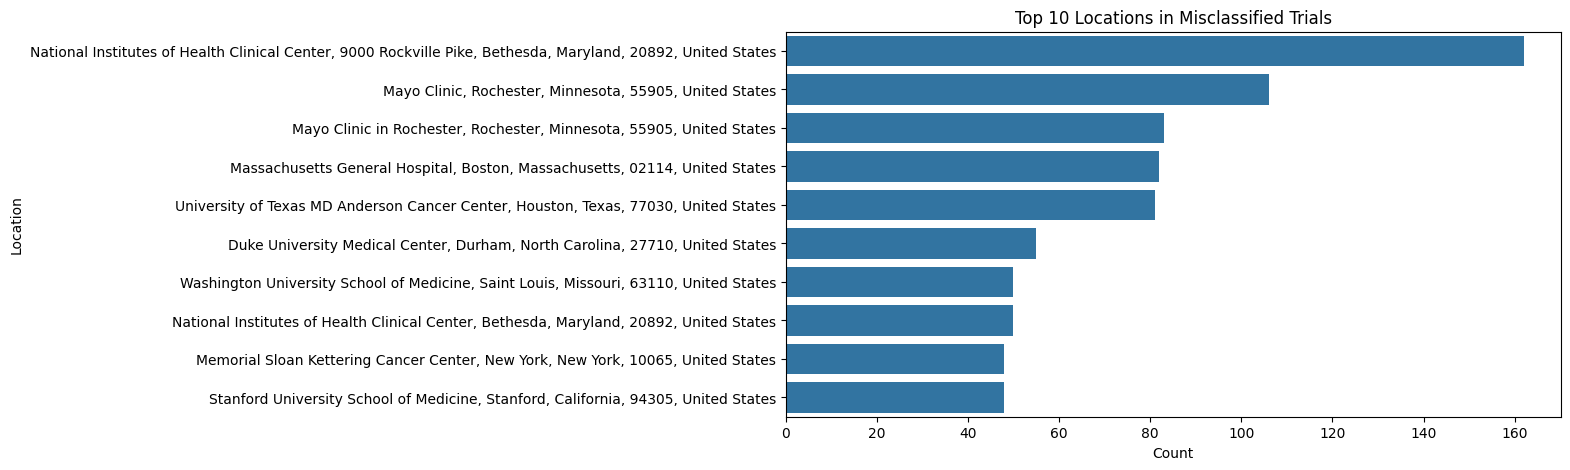

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Locations in Misclassified Trials
plt.figure(figsize=(10, 5))
sns.countplot(y=misclassified_df["Locations"], order=misclassified_df["Locations"].value_counts().index[:10])
plt.title("Top 10 Locations in Misclassified Trials")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

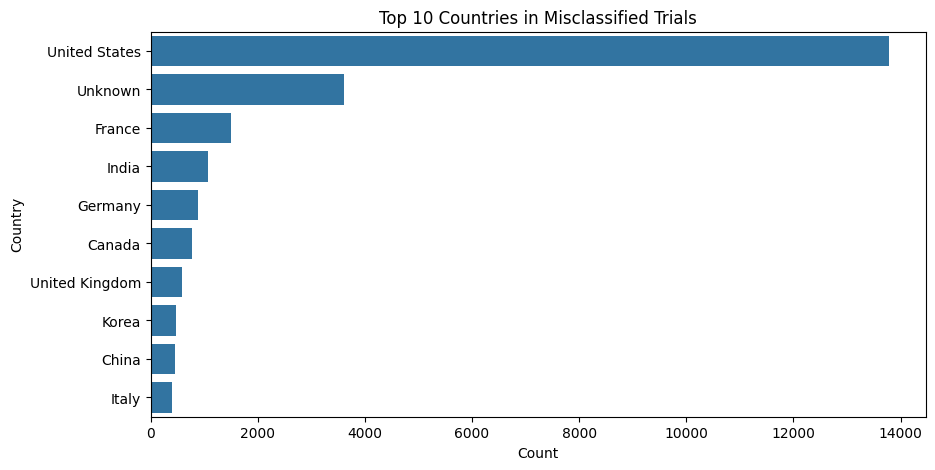

In [ ]:
# Top 10 Countries in Misclassified Trials
plt.figure(figsize=(10, 5))
sns.countplot(y=misclassified_df["Country"], order=misclassified_df["Country"].value_counts().index[:10])
plt.title("Top 10 Countries in Misclassified Trials")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

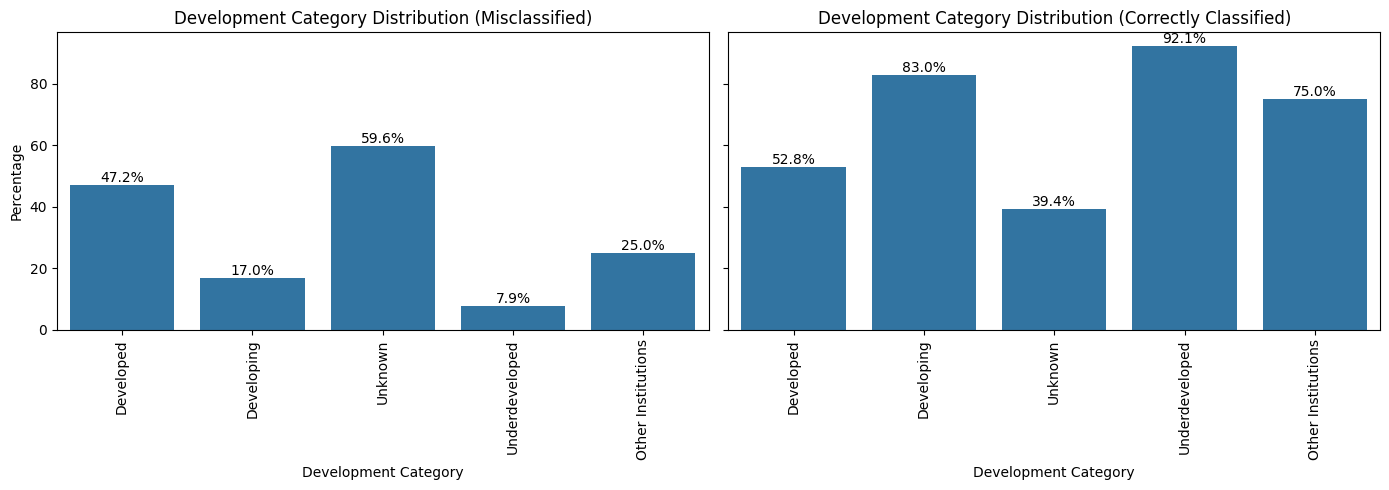

In [ ]:
# Calculate total counts for each Development Category in the entire dataset
total_dev_category_counts = usecase_3["Development Category"].value_counts()

# Calculate percentage distribution relative to total for misclassified and correctly classified trials
misclassified_dev_category = (misclassified_df["Development Category"].value_counts() / total_dev_category_counts) * 100
correctly_classified_dev_category = (correctly_classified_df["Development Category"].value_counts() / total_dev_category_counts) * 100

# Ensure both DataFrames have the same order of categories
categories_order = total_dev_category_counts.index

# Convert to DataFrame for visualization
misclassified_dev_category_df = misclassified_dev_category.reindex(categories_order).reset_index()
misclassified_dev_category_df.columns = ["Development Category", "Percentage"]
misclassified_dev_category_df.fillna(0, inplace=True)  # Fill NaN values with 0

correctly_classified_dev_category_df = correctly_classified_dev_category.reindex(categories_order).reset_index()
correctly_classified_dev_category_df.columns = ["Development Category", "Percentage"]
correctly_classified_dev_category_df.fillna(0, inplace=True)  # Fill NaN values with 0

# Plot percentage distribution with annotations ensuring both add up to 100%
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)  # Share Y-axis for better comparison

# Misclassified
sns.barplot(x="Development Category", y="Percentage", data=misclassified_dev_category_df, ax=ax[0], order=categories_order)
ax[0].set_title("Development Category Distribution (Misclassified)")
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylabel("Percentage")

# Annotate bars with percentages
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

# Correctly Classified
sns.barplot(x="Development Category", y="Percentage", data=correctly_classified_dev_category_df, ax=ax[1], order=categories_order)
ax[1].set_title("Development Category Distribution (Correctly Classified)")
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_ylabel("Percentage")

# Annotate bars with percentages
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

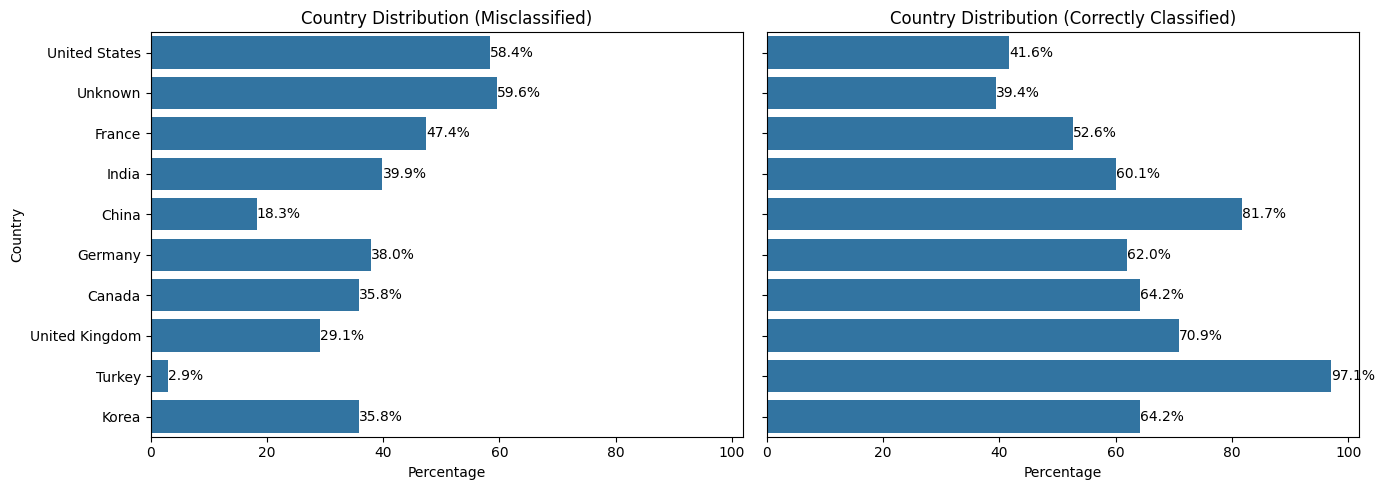

In [ ]:
# Calculate total counts for each Country in the entire dataset
total_country_counts = usecase_3["Country"].value_counts()

# Calculate percentage distribution relative to total for misclassified and correctly classified trials
misclassified_country = (misclassified_df["Country"].value_counts() / total_country_counts) * 100
correctly_classified_country = (correctly_classified_df["Country"].value_counts() / total_country_counts) * 100

# Ensure both DataFrames have the same order of categories
countries_order = total_country_counts.index[:10]  # Top 10 countries

# Convert to DataFrame for visualization
misclassified_country_df = misclassified_country.reindex(countries_order).reset_index()
misclassified_country_df.columns = ["Country", "Percentage"]
misclassified_country_df.fillna(0, inplace=True)  # Fill NaN values with 0

correctly_classified_country_df = correctly_classified_country.reindex(countries_order).reset_index()
correctly_classified_country_df.columns = ["Country", "Percentage"]
correctly_classified_country_df.fillna(0, inplace=True)  # Fill NaN values with 0

# Plot percentage distribution with annotations ensuring both add up to 100%
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharex=True, sharey=True)  # Share X and Y-axis for better comparison

# Misclassified
sns.barplot(y="Country", x="Percentage", data=misclassified_country_df, ax=ax[0], order=countries_order)
ax[0].set_title("Country Distribution (Misclassified)")
ax[0].set_ylabel("Country")
ax[0].set_xlabel("Percentage")

# Annotate bars with percentages
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_width():.1f}%',
                   (p.get_width(), p.get_y() + p.get_height() / 2.),
                   ha='left', va='center', fontsize=10)

# Correctly Classified
sns.barplot(y="Country", x="Percentage", data=correctly_classified_country_df, ax=ax[1], order=countries_order)
ax[1].set_title("Country Distribution (Correctly Classified)")
ax[1].set_ylabel("Country")
ax[1].set_xlabel("Percentage")

# Annotate bars with percentages
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_width():.1f}%',
                   (p.get_width(), p.get_y() + p.get_height() / 2.),
                   ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

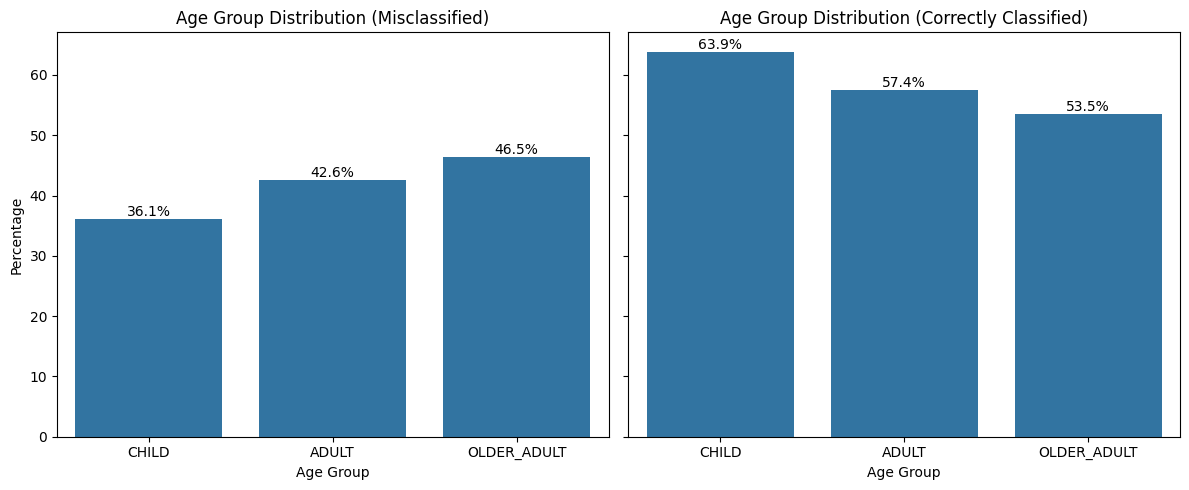

In [ ]:
# Calculate total counts for each Age Group category in the entire dataset
total_age_counts = usecase_3[["CHILD", "ADULT", "OLDER_ADULT"]].sum()

# Calculate percentage distribution relative to total for misclassified and correctly classified trials
misclassified_age = (misclassified_df[["CHILD", "ADULT", "OLDER_ADULT"]].sum() / total_age_counts) * 100
correctly_classified_age = (correctly_classified_df[["CHILD", "ADULT", "OLDER_ADULT"]].sum() / total_age_counts) * 100

# Convert to DataFrame for visualization
misclassified_age_df = misclassified_age.reset_index()
misclassified_age_df.columns = ["Age Group", "Percentage"]
misclassified_age_df.fillna(0, inplace=True)  # Fill NaN values with 0

correctly_classified_age_df = correctly_classified_age.reset_index()
correctly_classified_age_df.columns = ["Age Group", "Percentage"]
correctly_classified_age_df.fillna(0, inplace=True)  # Fill NaN values with 0

# Define Age Group order
age_order = ["CHILD", "ADULT", "OLDER_ADULT"]

# Plot percentage distribution with annotations ensuring both add up to 100%
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # Share Y-axis for better comparison

# Misclassified
sns.barplot(x="Age Group", y="Percentage", data=misclassified_age_df, ax=ax[0], order=age_order)
ax[0].set_title("Age Group Distribution (Misclassified)")
ax[0].set_ylabel("Percentage")

# Annotate bars with percentages
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

# Correctly Classified
sns.barplot(x="Age Group", y="Percentage", data=correctly_classified_age_df, ax=ax[1], order=age_order)
ax[1].set_title("Age Group Distribution (Correctly Classified)")
ax[1].set_ylabel("Percentage")

# Annotate bars with percentages
for p in ax[1].patches:
    ax[1].annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

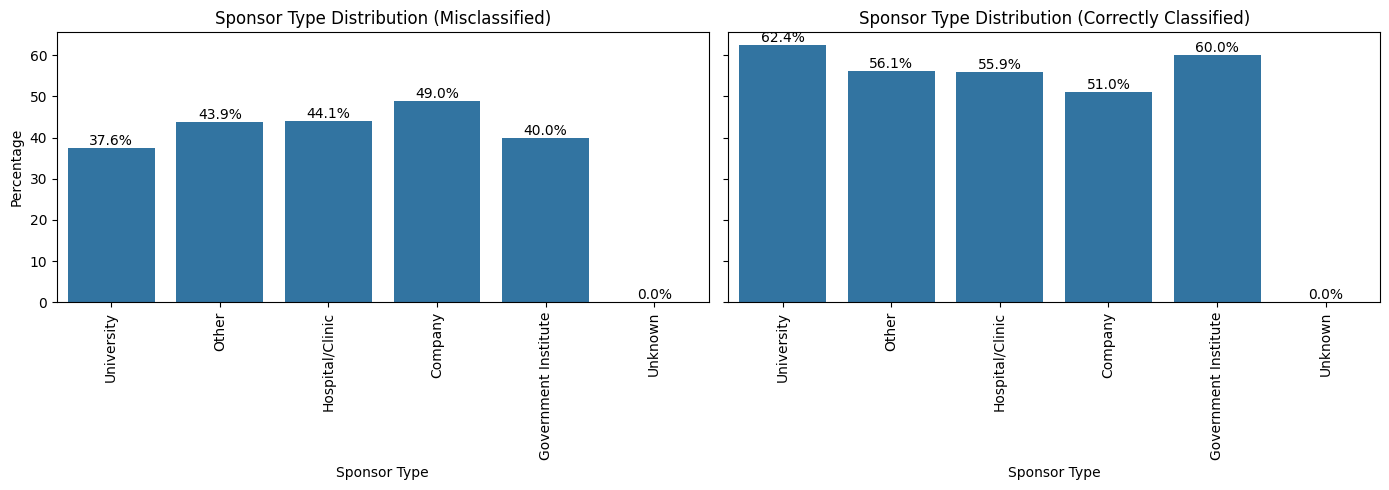

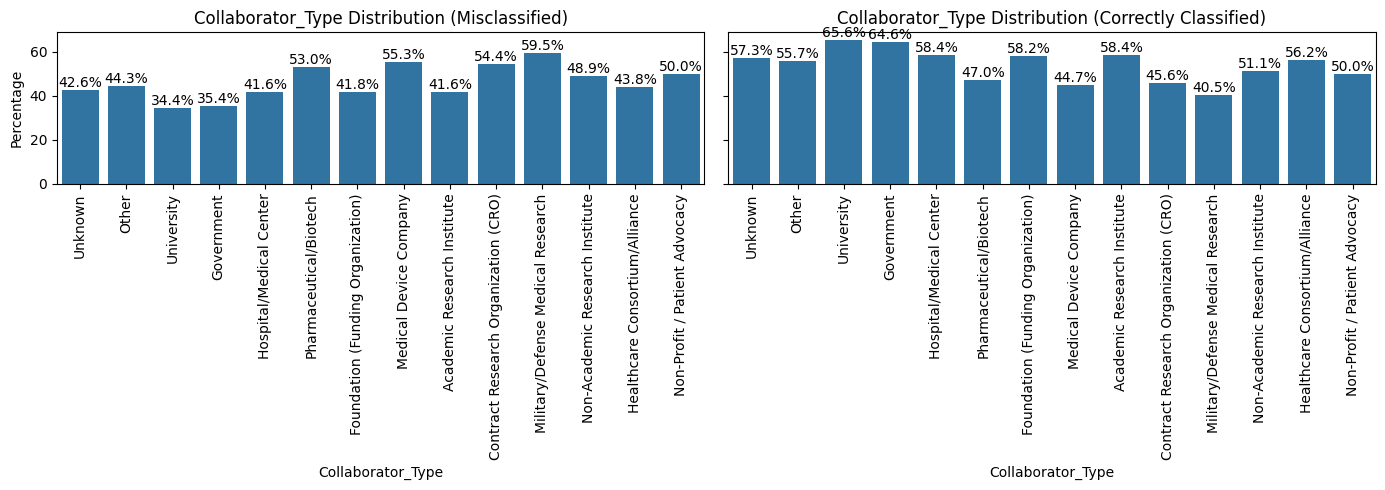

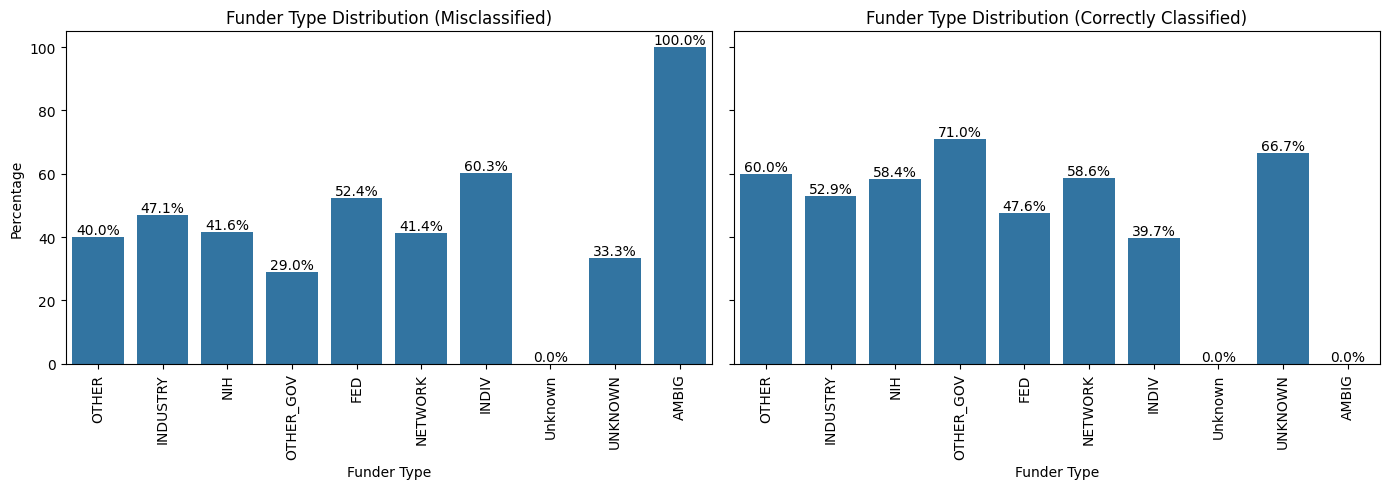

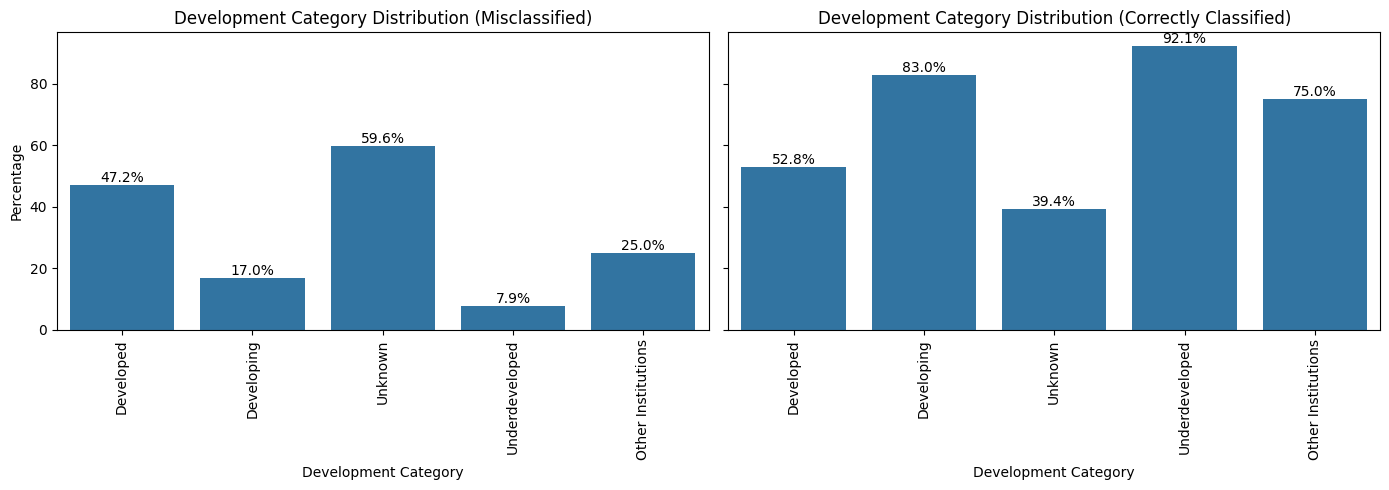

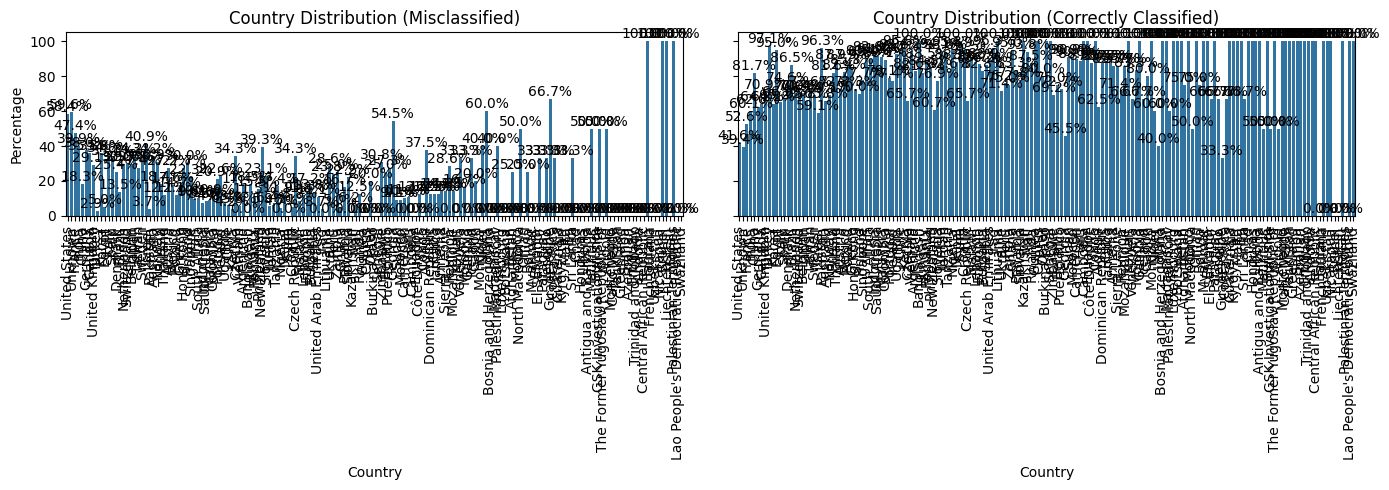

<ipython-input-145-38277fc03730>:54: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-145-38277fc03730>:54: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-145-38277fc03730>:54: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-145-38277fc03730>:54: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-145-38277fc03730>:54: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-145-38277fc03730>:54: UserWarning: Glyph 27993 (\N{CJK UNIFIED IDEOGRAPH-6D59}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-145-38277fc03730>:54: UserWarning: Glyph 27743 (\N{CJK UNIFIED IDEOGRAPH-6C5F}) missing from fo

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_misclassification_analysis(column_name):
    """
    Plots the percentage distribution of a categorical column for misclassified and correctly classified trials.
    """
    # Calculate total counts for each category in the entire dataset
    total_counts = usecase_3[column_name].value_counts()

    # Calculate percentage distribution relative to total for misclassified and correctly classified trials
    misclassified_counts = (misclassified_df[column_name].value_counts() / total_counts) * 100
    correctly_classified_counts = (correctly_classified_df[column_name].value_counts() / total_counts) * 100

    # Ensure both DataFrames have the same order of categories
    category_order = total_counts.index  # Keep the original order

    # Convert to DataFrame for visualization
    misclassified_df_plot = misclassified_counts.reindex(category_order).reset_index()
    misclassified_df_plot.columns = [column_name, "Percentage"]
    misclassified_df_plot.fillna(0, inplace=True)  # Fill NaN values with 0

    correctly_classified_df_plot = correctly_classified_counts.reindex(category_order).reset_index()
    correctly_classified_df_plot.columns = [column_name, "Percentage"]
    correctly_classified_df_plot.fillna(0, inplace=True)  # Fill NaN values with 0

    # Plot percentage distribution with annotations ensuring both add up to 100%
    fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # Misclassified
    sns.barplot(x=column_name, y="Percentage", data=misclassified_df_plot, ax=ax[0], order=category_order)
    ax[0].set_title(f"{column_name} Distribution (Misclassified)")
    ax[0].tick_params(axis='x', rotation=90)
    ax[0].set_ylabel("Percentage")

    # Annotate bars with percentages
    for p in ax[0].patches:
        ax[0].annotate(f'{p.get_height():.1f}%',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10)

    # Correctly Classified
    sns.barplot(x=column_name, y="Percentage", data=correctly_classified_df_plot, ax=ax[1], order=category_order)
    ax[1].set_title(f"{column_name} Distribution (Correctly Classified)")
    ax[1].tick_params(axis='x', rotation=90)
    ax[1].set_ylabel("Percentage")

    # Annotate bars with percentages
    for p in ax[1].patches:
        ax[1].annotate(f'{p.get_height():.1f}%',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()


# Columns to analyze
columns_to_analyze = ["Sponsor Type", "Collaborator_Type", "Funder Type",
                      "Development Category", "Country", "Locations", "CHILD", "ADULT", "OLDER_ADULT"]

# Run analysis for each column
for col in columns_to_analyze:
    plot_misclassification_analysis(col)